In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Census income project

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

1] Given dataframe have 15 varables(columns) and 32560 datapoints(rows).

2] Income is target variable. or label which we have to predict.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1] Given dataset have not any missing value in any variable.

2] 06 variables have integer datatype

3] 09 variables are of object datatype.

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* 1] Age of people in dataset is above 17 and within 90.
   
  2] 25% to & 75% of persons have age between 28 to 48.
  
  2] 75% of people are under 48 of age.
  
  3] more than 75% of persons have 0 capital_gain. This data is right skewed in nature
  
  4] more than 75% person have 0 capital loss.This data is right skewed in nature
  
  5] 25% to to 75% of persons work for 40 to 45 hours_per_week
  
  6] upto 25% person work for les than 40 hours while  minimum value obtain is 1 hour.
  
  7] Education Num is appears to Categorical data .
  


* Analysis of missing values in dataset

In [6]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.isna().sum().sum()

0

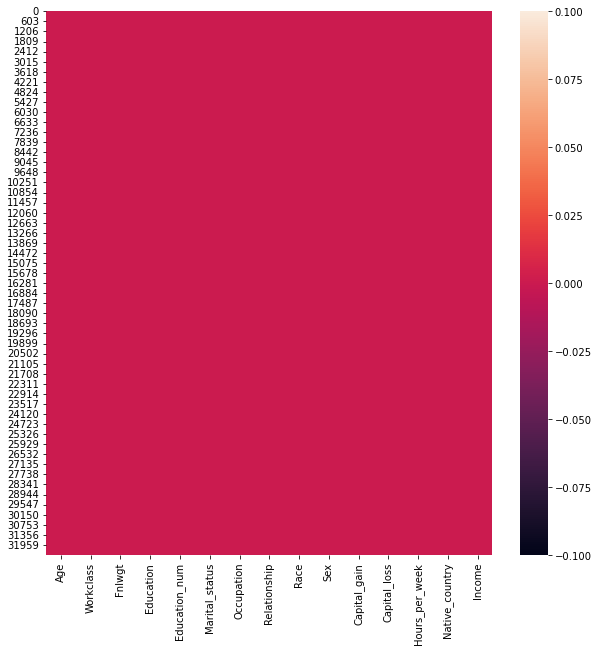

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

1] There are not missing values observed in heatmap.

2] As count ofor missing values is 0 for all variable s ahence no missing data is observed .

In [9]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

Age :

73
______________________________

Workclass :

9
______________________________

Fnlwgt :

21647
______________________________

Education :

16
______________________________

Education_num :

16
______________________________

Marital_status :

7
______________________________

Occupation :

15
______________________________

Relationship :

6
______________________________

Race :

5
______________________________

Sex :

2
______________________________

Capital_gain :

119
______________________________

Capital_loss :

92
______________________________

Hours_per_week :

94
______________________________

Native_country :

42
______________________________

Income :

2
______________________________



1) Edication_num is categorical variable with 16 categories.

In [10]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Age 

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
----------------------------------

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

----------------------------------

Workclass 

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

----------------------------------

Fnlwgt 

[ 83311 215646 234721 ...  34066  84661 257302]
-------

* Category with value counts are as shown in above block.

* seprating numeric and object datatype variables in dataset

In [11]:
num=[]
obj=[]
for i in df.columns:
    if df[i].dtype==np.object:
        obj.append(i)
    else:
        num.append(i)
print(len(num))
print(num)
print("--------------------------")
print(len(obj))
print(obj)

6
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
--------------------------
9
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [12]:
len(df.columns)==len(num)+len(obj)

True

* Descriptive statstics of numeric variable.

In [13]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* Analysis of zeros in Capital_gain 

In [14]:
df['Capital_gain'][df["Capital_gain"]==0].count()


29849

In [15]:
df['Income'][df["Capital_gain"]==0].value_counts()

 <=50K    23685
 >50K      6164
Name: Income, dtype: int64

<AxesSubplot:>

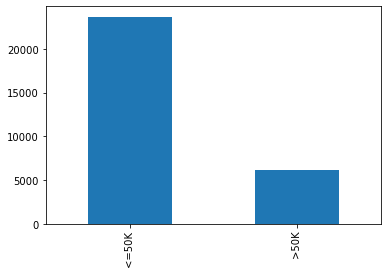

In [16]:
df['Income'][df["Capital_gain"]==0].value_counts().plot.bar()

* Out of 32560 datapoints , there are 29849 values are 0.

* Analysis of zeros in Capital_loss

In [17]:
df['Capital_loss'][df["Capital_loss"]==0].count()

31041

In [18]:
df['Income'][df["Capital_loss"]==0].value_counts()

 <=50K    23973
 >50K      7068
Name: Income, dtype: int64

<AxesSubplot:>

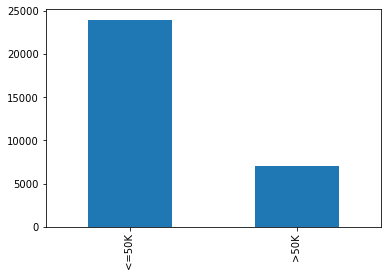

In [19]:
df['Income'][df["Capital_loss"]==0].value_counts().plot.bar()

* Out of 32560 datapoints , there are 31041 values are 0.

* Capital_gain and Capital_loss can be removed but further investigation proof  are required .

* Distribution of numeric variables

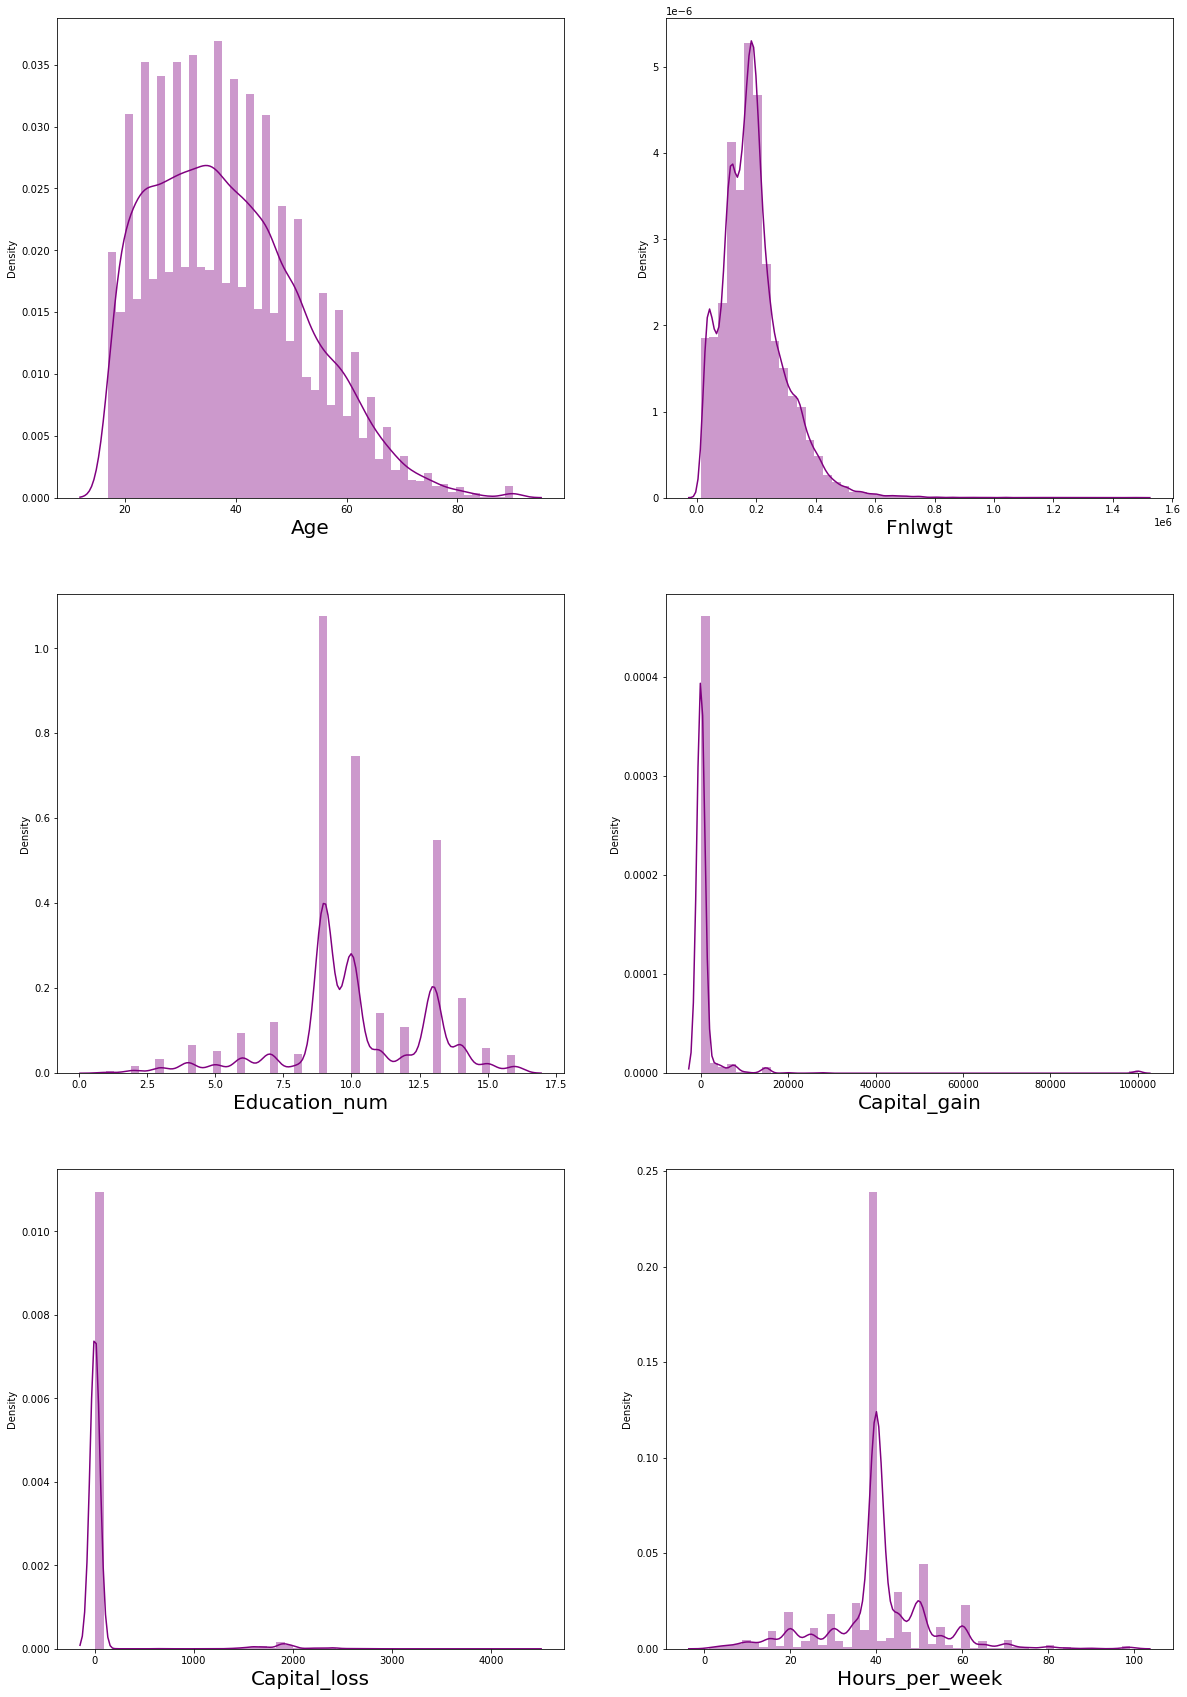

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in num:
    if graph<=6:
        ax=plt.subplot(3,2,graph)
        sns.distplot(df[column],color='purple')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Education_num is acategorical in Nature

2] as Capital_gain and Capital_loss have large amount of zero values.thee may be outliers in dataset as data is right skewed

* Countplot of object datatype feature and label

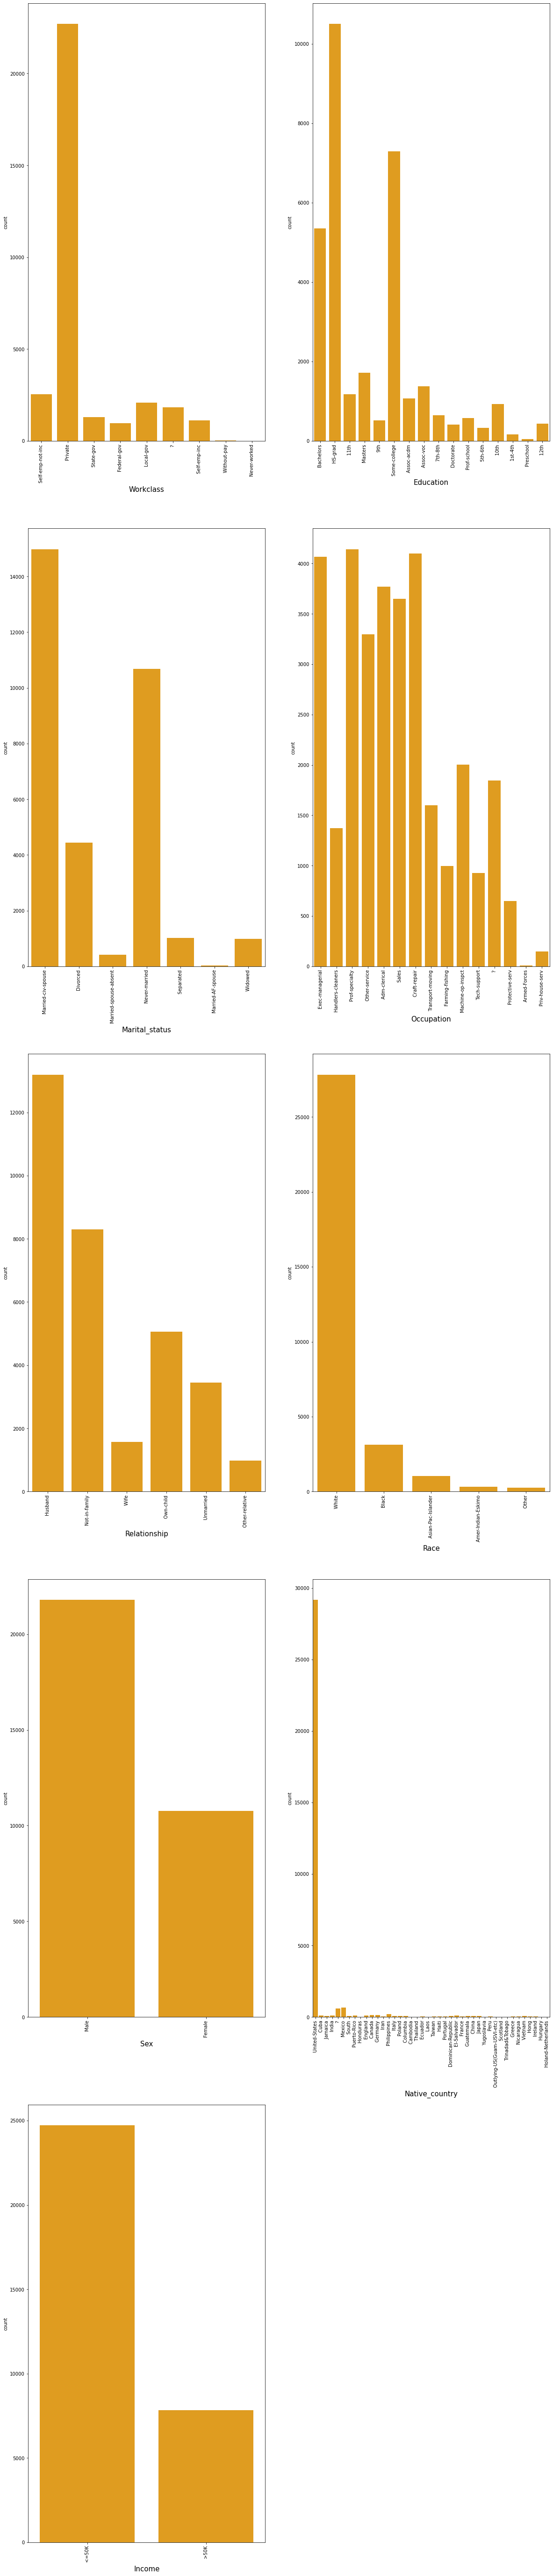

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,100))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=9:
        ax=plt.subplot(5,2,graph)
        sns.countplot(df[column],color='orange')
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation='90')
        
    graph+=1
plt.show()
plt.tight_layout()

1] person with private workclass are more than any other class.wihout work and withou pay person are very less.

2] Mostly people have Hs-grad or  bachelors  education.  least people belongs to preschool.

3] mostly people belongs to maried-civ-spuse and Never_married .

5] least people belongs to Private house servant or armed forces category.

6] Mostly people are belongs to Husband and Notin Family category.

7] mostly people data of either white or black race other categories are very less.

8] data contains mostly mens

9] only one category can be significantly observe in native _country.

* Pie chart for categorywise distribution of categorical variables.

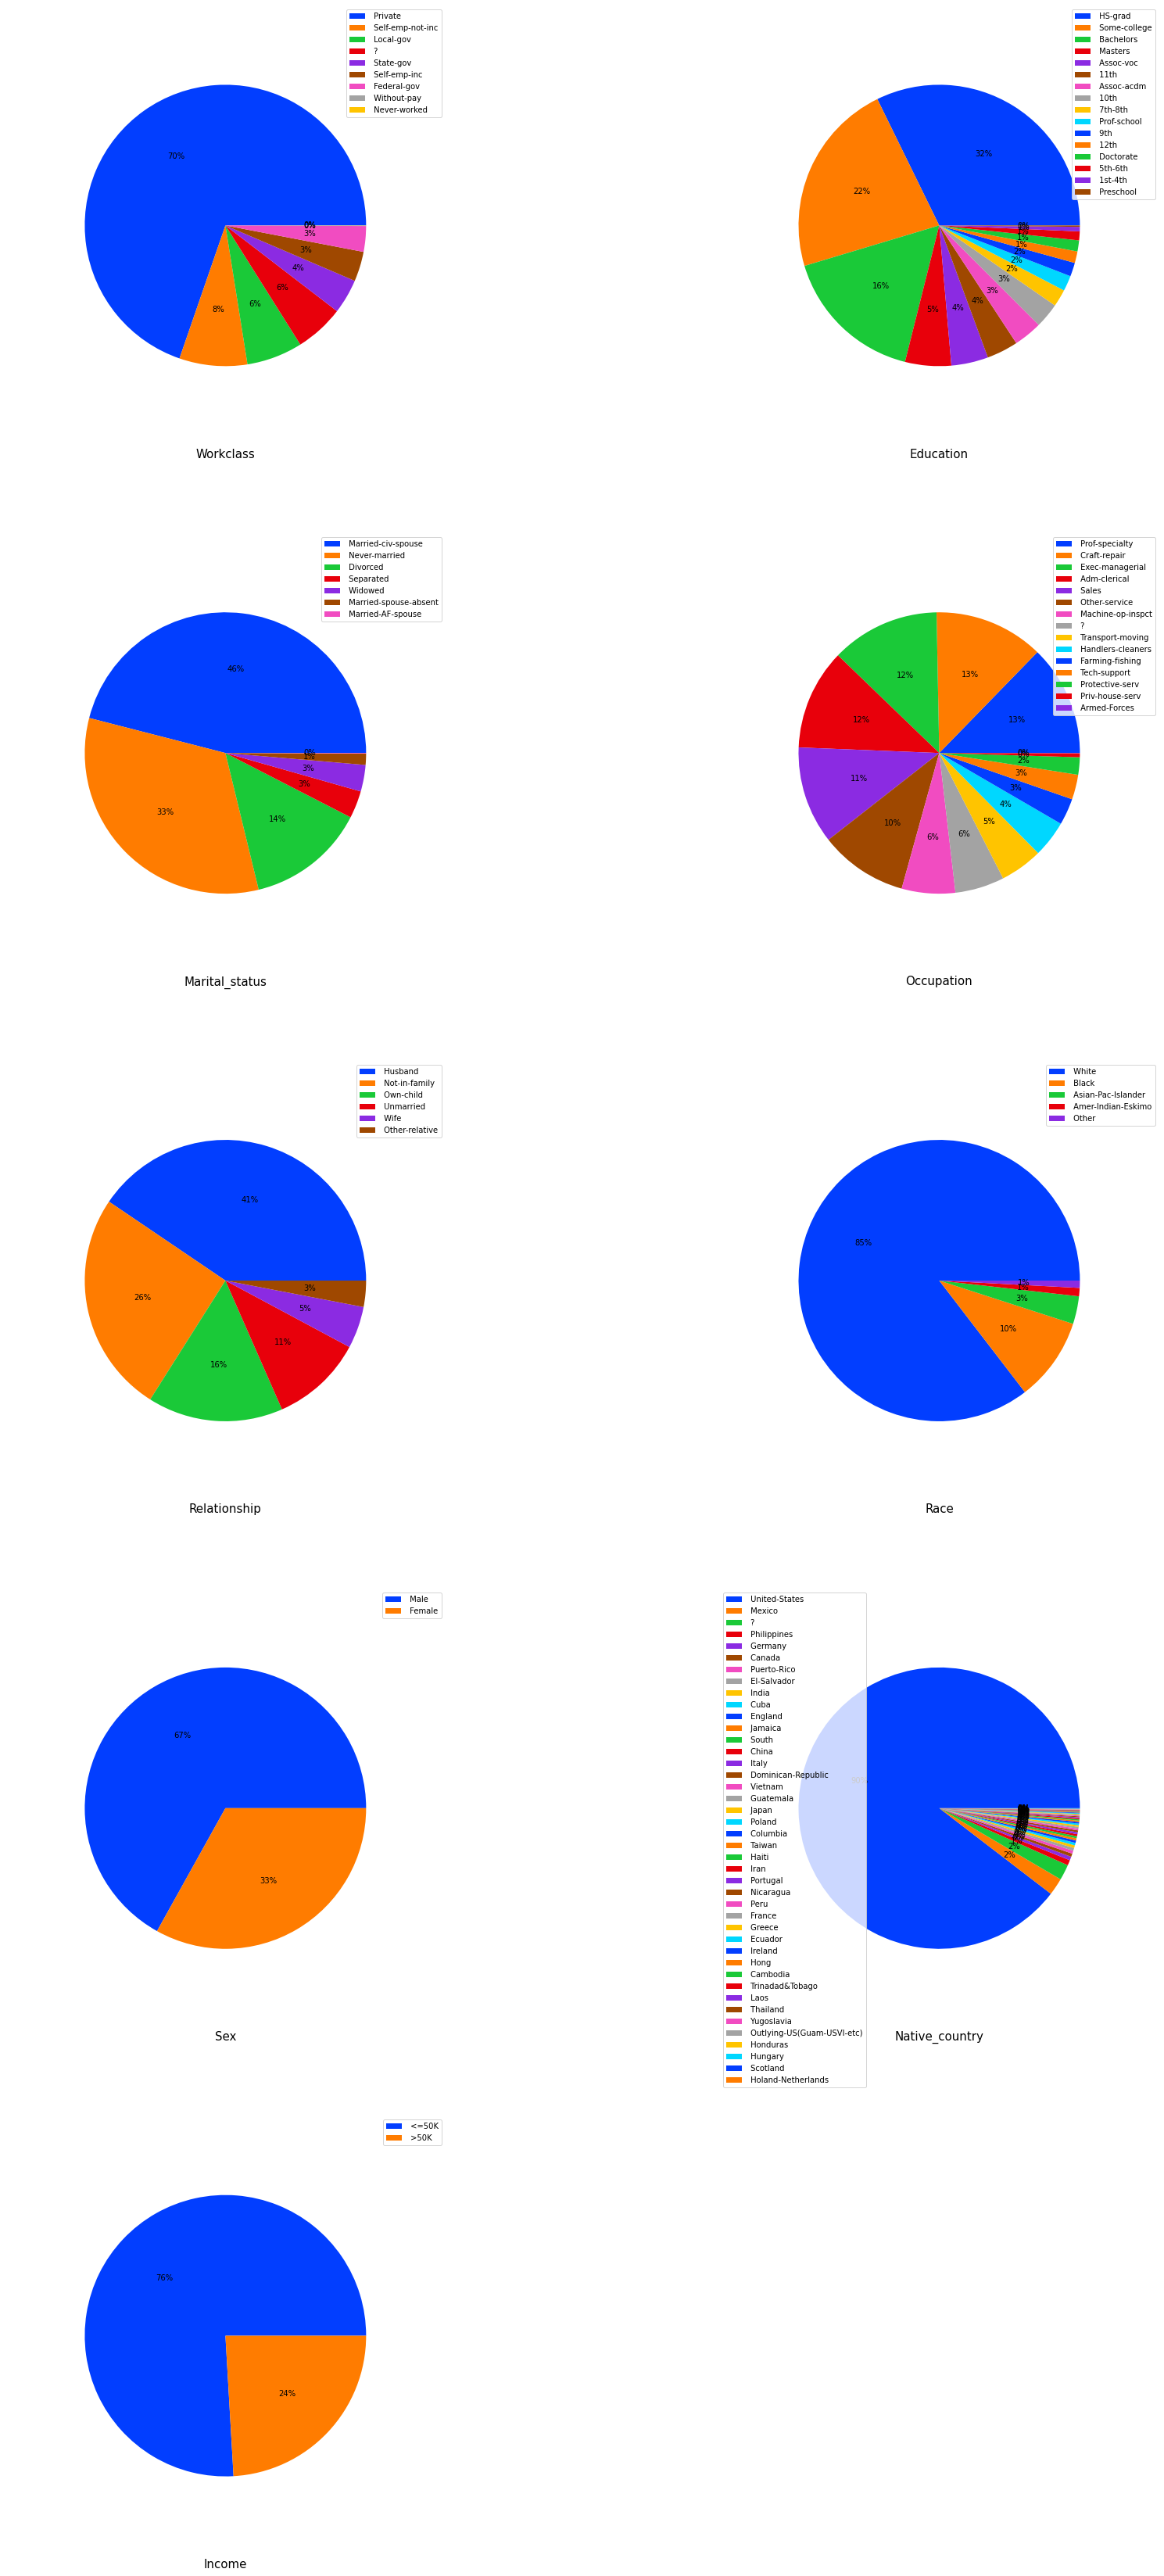

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(30,60))
sns.set_palette('bright')
graph=1

for column in obj:
    if graph<=9:
        ax=plt.subplot(5,2,graph)
        plt.pie(x=df[column].value_counts(),autopct='%0.00f%%',radius=0.8)
        plt.legend(df[column].value_counts().index,loc='best')
        plt.xlabel(column,fontsize=15)
      
        
    graph+=1
plt.show()
plt.tight_layout()

1] out of all people, 70% of people are in private workclass rest are of less 10% contribution. 

2] 32% people have Hs-grad education, 22% of people have some_college education class, 16% of people are from Bachelors education. resr of classes have less than 5% contribution each.

3] THe 46% of people belongs to  Married_Civ-spouse class, 33% belongs to Never Married class,Divorced are 14 % contribution in Marrital_status.

4] Occupation has all caegories contribute nearly eqaul .

5]  41 % peoples in dataset are husbands 26% peoples are living alone , 16% are own child and 11% peoples are Unmarried.

6] 85% peoples are from white race and 10% are from black race. while rest 5% belongs to other 3 races.

7] data incluedes 67 % are men while 33% are female.

8] 76% peoples have less than 50k income while rest have more than 50k income.

* skewnesss

In [23]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

* from skewness, decsriptive stats,presence high amount of outliers  and presence of more than 90% data is zero in Capital_gain and Capital_loss feature we can remove these features to avoid damaged in predictive power of models. 

* Elimination of Capital_gain and Capital_loss from dataset.

In [24]:
df=df.drop(columns=['Capital_gain','Capital_loss'],axis=1)
print("Shape of Dataste after removal of Capital features",df.shape)
print("--------------------------------------")
df.head()

Shape of Dataste after removal of Capital features (32560, 13)
--------------------------------------


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [25]:
df.shape

(32560, 13)

Now datset has 13 variables out which 12 are indicators and Income is label.

* Relationship of features with label Income

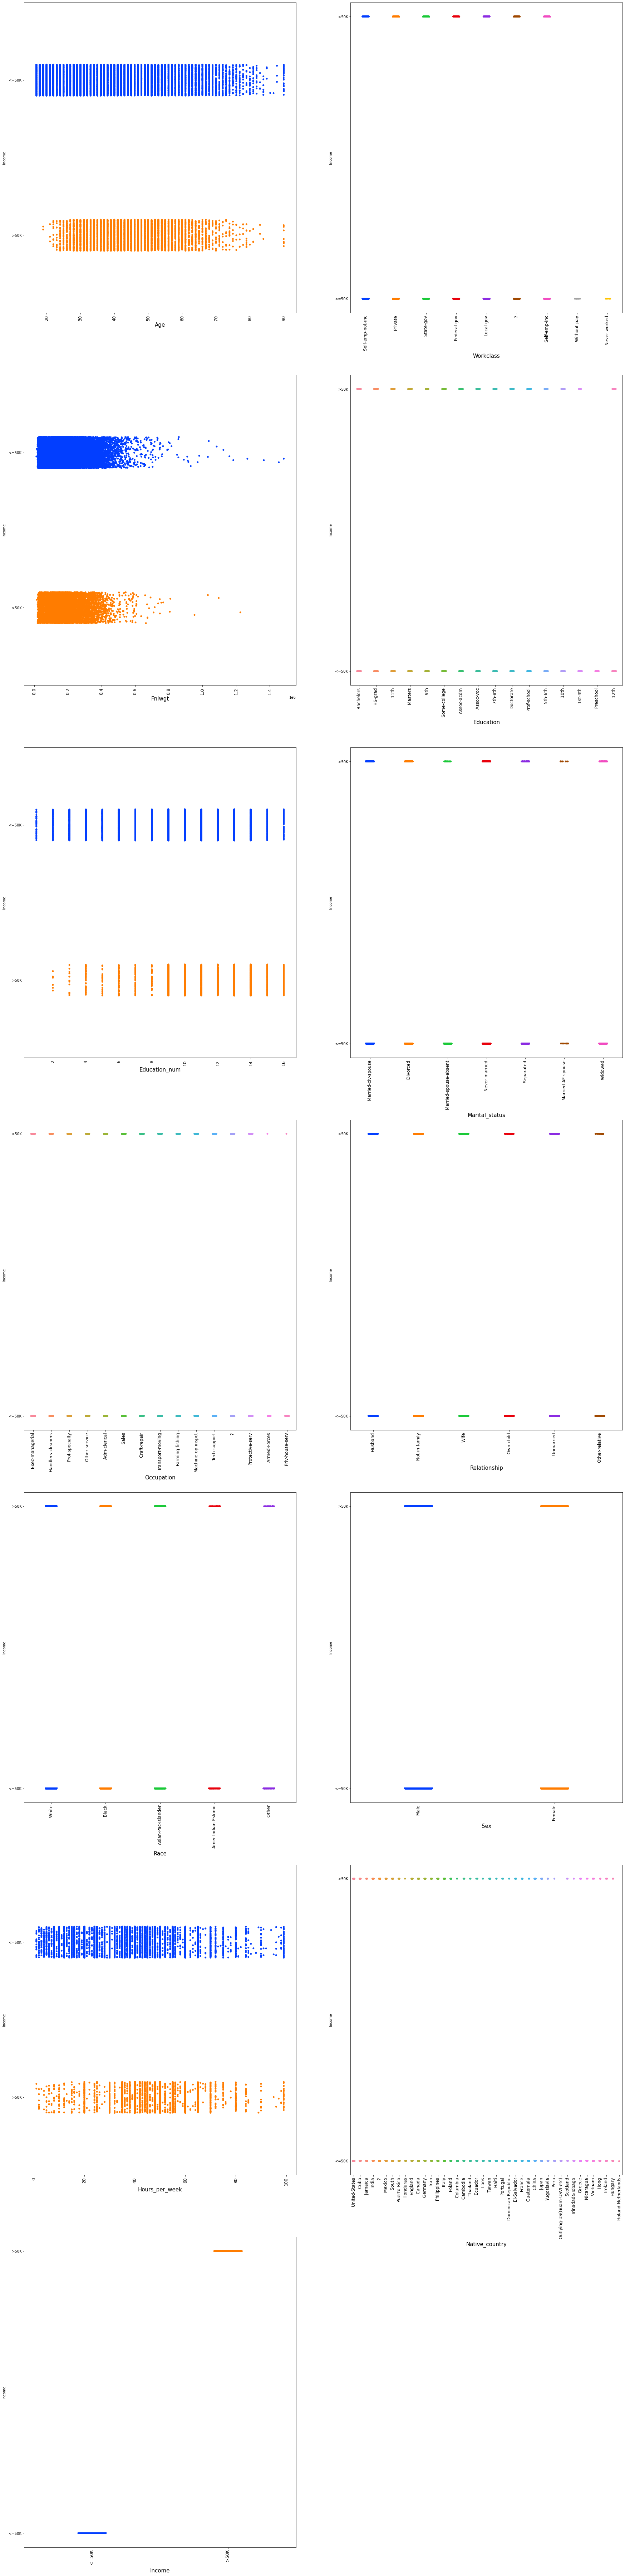

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(30,150))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=15:
        ax=plt.subplot(8,2,graph)
        sns.stripplot(x=df[column],y=df['Income'])
        plt.xlabel(column,fontsize=15)
        plt.xticks(fontsize=12,rotation='90')
        
    graph+=1
plt.show()
plt.tight_layout()

1] from bivariate plot of age and income , The people having more than 50 k income are under age of 30 to 60,
 while for people having income less tha 50k have age ranges from minimum to maximum.
 
2] Fnlwgt has highedst data in less than 50k income.

3] In Education,person belongs to  Preschool has income not  more than 50 k .

4] There is leass income with less Education_num.

5] For people having Income more than 50k ,more  people work for more than 40 to 60 hours in week.



* Note: Groupby method with Income ( % values are given in below observstions are with category to category not with whole count in category.) 

1] Income Gropby Workclass

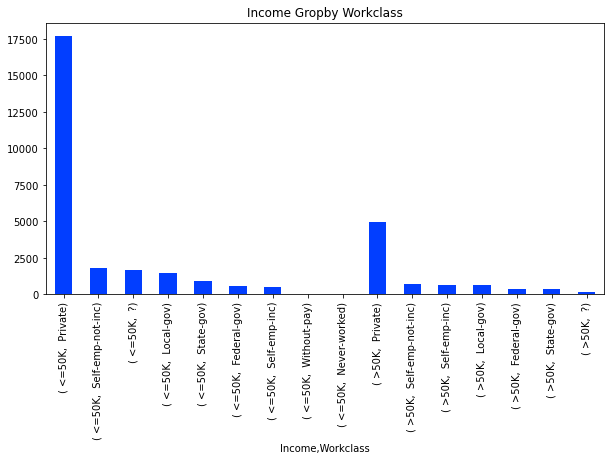

In [27]:
plt.figure(figsize=(10,5))
df.groupby('Income')['Workclass'].value_counts().plot.bar()
plt.title('Income Gropby Workclass')
plt.show()


In [28]:
df.groupby('Income')['Workclass'].value_counts()

Income  Workclass        
 <=50K   Private             17733
         Self-emp-not-inc     1817
         ?                    1645
         Local-gov            1476
         State-gov             944
         Federal-gov           589
         Self-emp-inc          494
         Without-pay            14
         Never-worked            7
 >50K    Private              4963
         Self-emp-not-inc      724
         Self-emp-inc          622
         Local-gov             617
         Federal-gov           371
         State-gov             353
         ?                     191
Name: Workclass, dtype: int64

1] Most of people about 75% have income less than 50K in private workclass.

2] Other workclass, 60-40 % people have income more than 50k and 40-60% have less than 50k.

3] For unnamed workclass ? , about 10% people earns more than 50k.

2] Income Gropby marital status

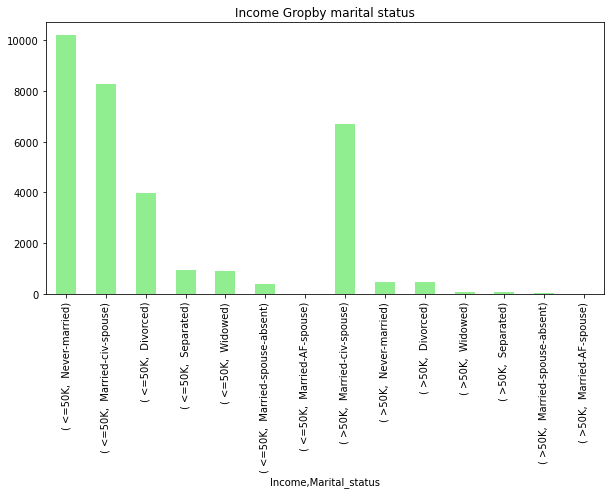

In [29]:
plt.figure(figsize=(10,5))
df.groupby('Income')['Marital_status'].value_counts().plot.bar(color='lightgreen')
plt.title('Income Gropby marital status')
plt.show()


In [30]:
df.groupby('Income')['Marital_status'].value_counts()

Income  Marital_status        
 <=50K   Never-married            10191
         Married-civ-spouse        8284
         Divorced                  3980
         Separated                  959
         Widowed                    908
         Married-spouse-absent      384
         Married-AF-spouse           13
 >50K    Married-civ-spouse        6692
         Never-married              491
         Divorced                   463
         Widowed                     85
         Separated                   66
         Married-spouse-absent       34
         Married-AF-spouse           10
Name: Marital_status, dtype: int64

1] 95% of  Never Married people have less than 50K income.

2] people belongs to Married-civ-spouse class have about 45-55 % ratio that to have Income less or more than 50k

3] 15% people from Divorced class have more than 50k income.

* 3] Income Gropby Education_num

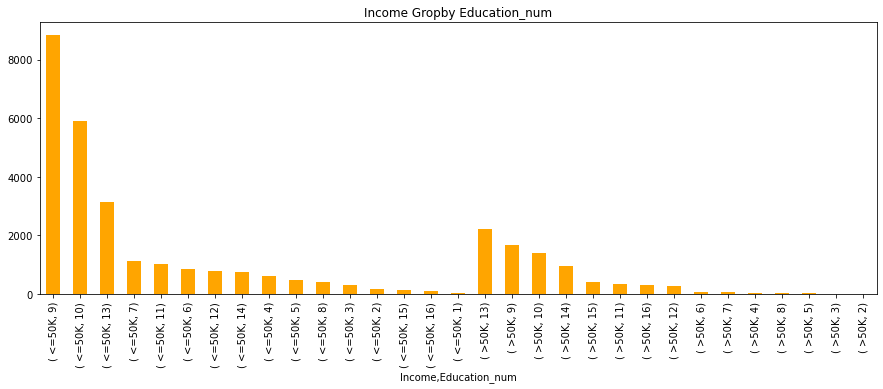

In [31]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Education_num'].value_counts().plot.bar(color='orange')
plt.title('Income Gropby Education_num')
plt.show()


In [32]:
df.groupby('Income')['Education_num'].value_counts()

Income  Education_num
 <=50K  9                8826
        10               5904
        13               3133
        7                1115
        11               1021
        6                 871
        12                802
        14                764
        4                 606
        5                 487
        8                 400
        3                 317
        2                 162
        15                153
        16                107
        1                  51
 >50K   13               2221
        9                1675
        10               1387
        14                959
        15                423
        11                361
        16                306
        12                265
        6                  62
        7                  60
        4                  40
        8                  33
        5                  27
        3                  16
        2                   6
Name: Education_num, dtype: int64

1] 15% people have Educationum 9 class have income more than than 50k

2] Educatio_num 13 class have about half people have income more than 50k

* Income Gropby Education

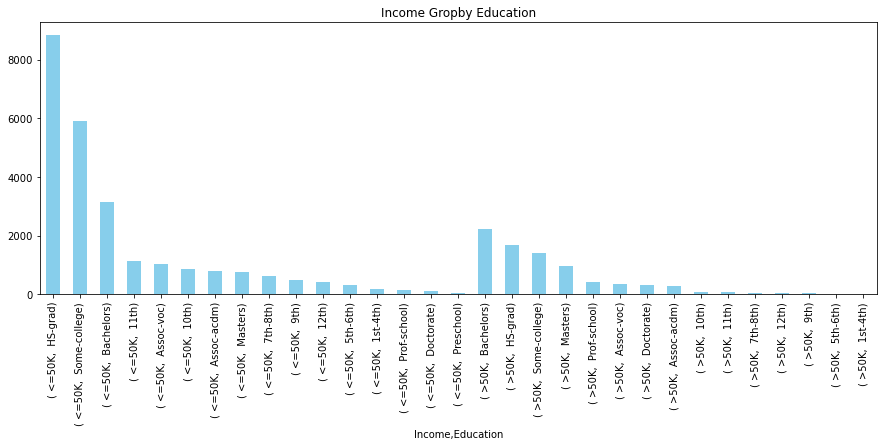

In [33]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Education'].value_counts().plot.bar(color='skyblue')
plt.title('Income Gropby Education')
plt.show()


In [34]:
df.groupby('Income')['Education'].value_counts()

Income  Education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3133
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: Education, dtype: int64

1] about 50% people in Bachelors class have more than 50k Income.

2] people with Masters ans Doctorate  have high probability to earn more than 50 k.



* Income Gropby Occupation

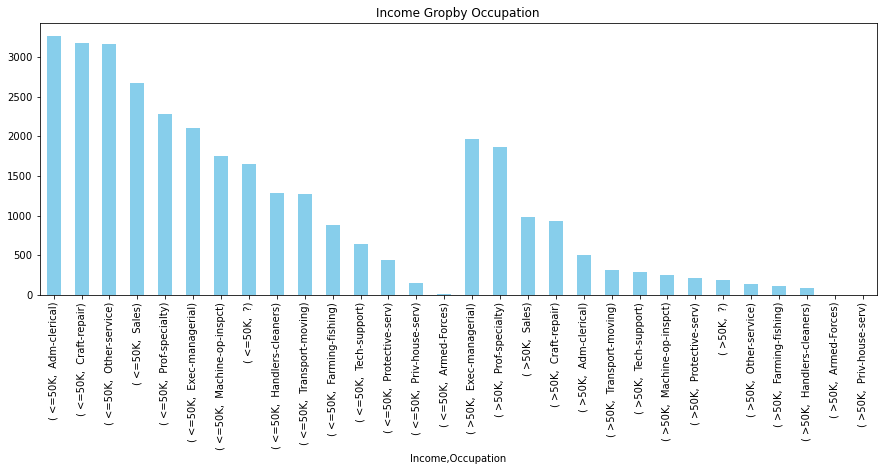

In [35]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Occupation'].value_counts().plot.bar(color='skyblue')
plt.title('Income Gropby Occupation')
plt.show()


In [36]:
df.groupby('Income')['Occupation'].value_counts()

Income  Occupation        
 <=50K   Adm-clerical         3262
         Craft-repair         3170
         Other-service        3158
         Sales                2667
         Prof-specialty       2281
         Exec-managerial      2098
         Machine-op-inspct    1752
         ?                    1652
         Handlers-cleaners    1284
         Transport-moving     1277
         Farming-fishing       879
         Tech-support          645
         Protective-serv       438
         Priv-house-serv       148
         Armed-Forces            8
 >50K    Exec-managerial      1968
         Prof-specialty       1859
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     250
         Protective-serv       211
         ?                     191
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners  

* Ratios are Same as observed in Income .

* Income Gropby Relationship

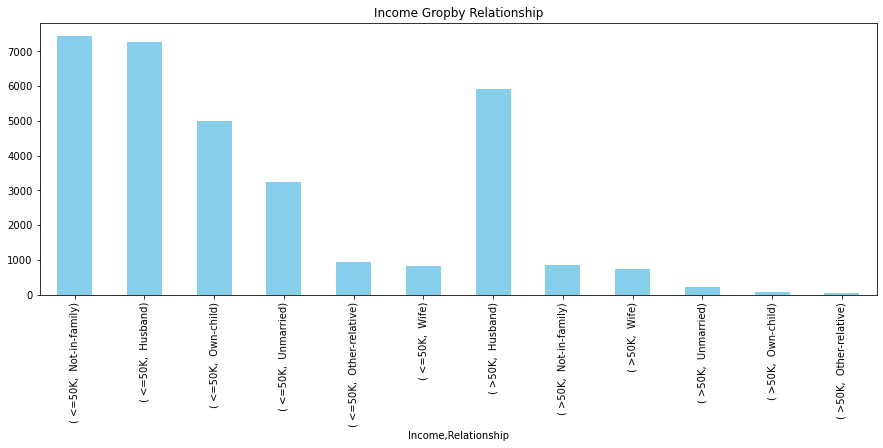

In [37]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Relationship'].value_counts().plot.bar(color='skyblue')
plt.title('Income Gropby Relationship')
plt.show()

In [38]:
df.groupby('Income')['Relationship'].value_counts()

Income  Relationship   
 <=50K   Not-in-family     7448
         Husband           7275
         Own-child         5001
         Unmarried         3228
         Other-relative     944
         Wife               823
 >50K    Husband           5918
         Not-in-family      856
         Wife               745
         Unmarried          218
         Own-child           67
         Other-relative      37
Name: Relationship, dtype: int64

1] people who dont live alone without family have about 10% contribution in more than 50k Income.

2] wife in family have 50% -50% ratio in more than and less tahn 50k income.

* Income Gropby Race

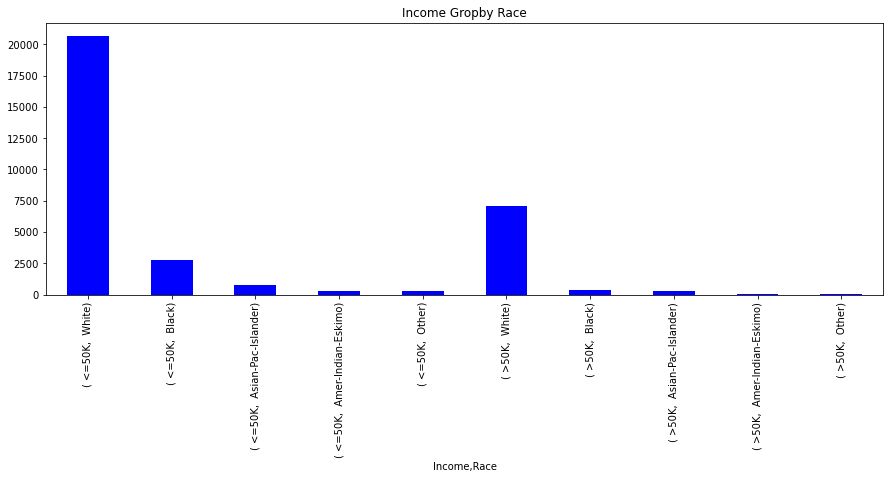

In [39]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Race'].value_counts().plot.bar(color='blue')
plt.title('Income Gropby Race')
plt.show()

In [40]:
df.groupby('Income')['Race'].value_counts()

Income  Race               
 <=50K   White                 20698
         Black                  2737
         Asian-Pac-Islander      763
         Amer-Indian-Eskimo      275
         Other                   246
 >50K    White                  7117
         Black                   387
         Asian-Pac-Islander      276
         Amer-Indian-Eskimo       36
         Other                    25
Name: Race, dtype: int64

* As 15% people earn ;ess than and more than 50k , same can be observe for White and black,While other categories have very less ratio.

* Income Gropby Sex

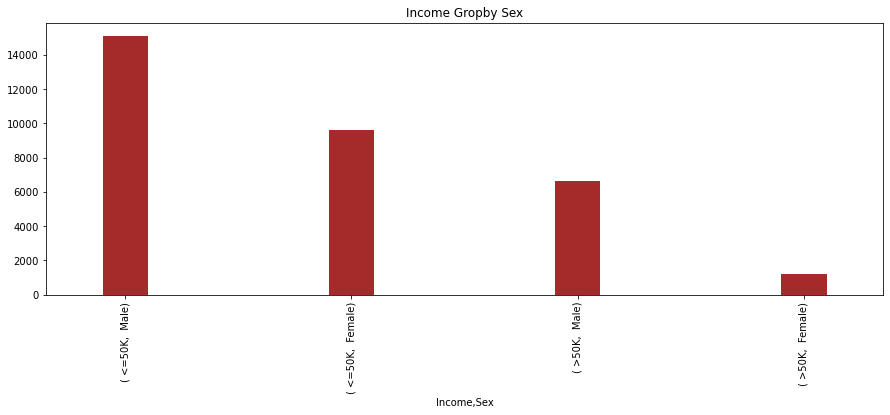

In [41]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Sex'].value_counts().plot.bar(color='brown',width=0.2)
plt.title('Income Gropby Sex')
plt.show()

In [42]:
df.groupby('Income')['Sex'].value_counts()

Income  Sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: Sex, dtype: int64

1] The percent of male from less than 50k income to more than 50k income is 40%



* Fnlwgt Gropby Income

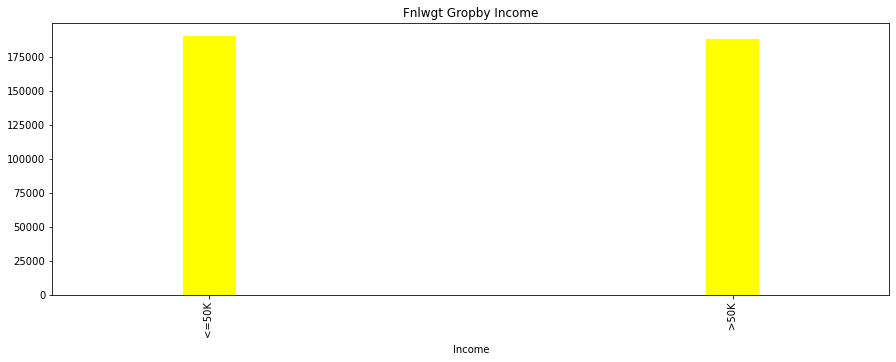

In [43]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Fnlwgt'].mean().plot.bar(color='yellow',width=0.1)
plt.title('Fnlwgt Gropby Income')
plt.show()

In [44]:
df.groupby('Income')['Fnlwgt'].mean()

Income
 <=50K    190345.429467
 >50K     188005.000000
Name: Fnlwgt, dtype: float64

1] finslwight mean have in both classes.

* Age Gropby Income

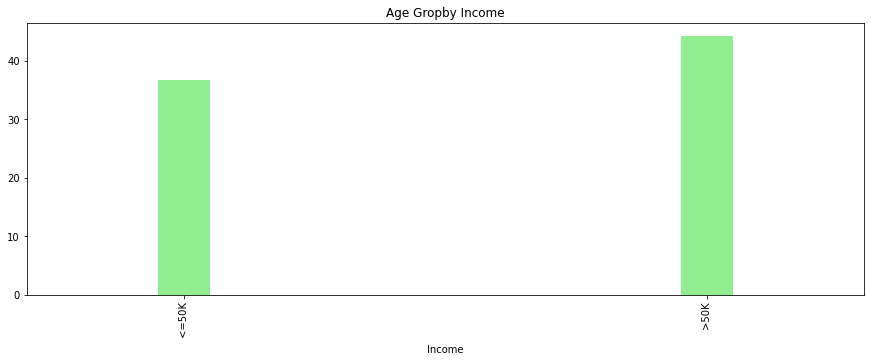

In [45]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Age'].mean().plot.bar(color='lightgreen',width=0.1)
plt.title('Age Gropby Income')
plt.show()

In [46]:
df.groupby('Income')['Age'].mean()

Income
 <=50K    36.783648
 >50K     44.249841
Name: Age, dtype: float64

1] although more population belongs to less than 50K , mean of ages of people is less for this class .
   which indictes than people having low income have lower ages .
   
2] High aged people have high income.   

* Hours_per_week Gropby Income

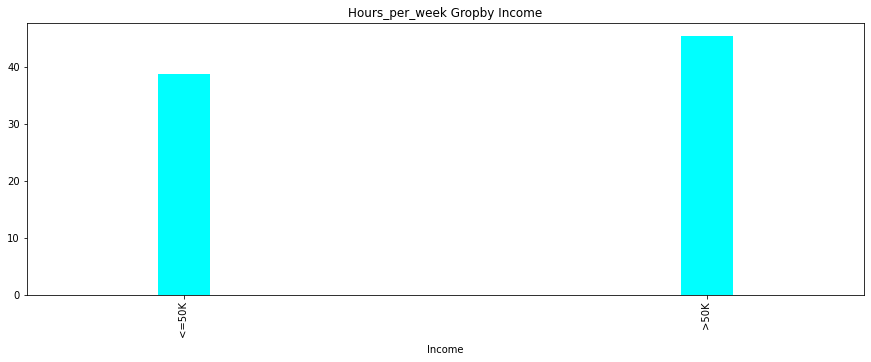

In [47]:
plt.figure(figsize=(15,5))
df.groupby('Income')['Hours_per_week'].mean().plot.bar(color='cyan',width=0.1)
plt.title('Hours_per_week Gropby Income')
plt.show()

In [48]:
df.groupby('Income')['Hours_per_week'].mean()

Income
 <=50K    38.840163
 >50K     45.473026
Name: Hours_per_week, dtype: float64

1] People having high income also works for more hours in week

2] people having less Income works for less hours.

* Encode Features having object Datatype

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj:
    df[i]=le.fit_transform(df[i])

In [50]:
for i in obj:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')

Workclass 

[6 4 7 1 2 0 5 8 3]
----------------------------------

Education 

[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
----------------------------------

Marital_status 

[2 0 3 4 5 1 6]
----------------------------------

Occupation 

[ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
----------------------------------

Relationship 

[0 1 5 3 4 2]
----------------------------------

Race 

[4 2 1 0 3]
----------------------------------

Sex 

[1 0]
----------------------------------

Native_country 

[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
----------------------------------

Income 

[0 1]
----------------------------------



* As Maximum categories 12 are in Native_country features so it can be used for dividing dataset into continuous and categorial features.
 
 1] If more than 42 categories in variable it will be continuous in this dataset
    
 2] Else less than 42 categories in variable then it is categorical variable.   

* Dividing variables in continuous and categorical varibles.

In [51]:

cont=[]
cat=[]
for i in df.columns:
    if len(df[i].unique())>42:
        cont.append(i)
        
    else:
        cat.append(i)
        
print(len(cont))
print(cont)
print('-'*30)
print(len(cat))
print(cat)

3
['Age', 'Fnlwgt', 'Hours_per_week']
------------------------------
10
['Workclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


* Outlier detection

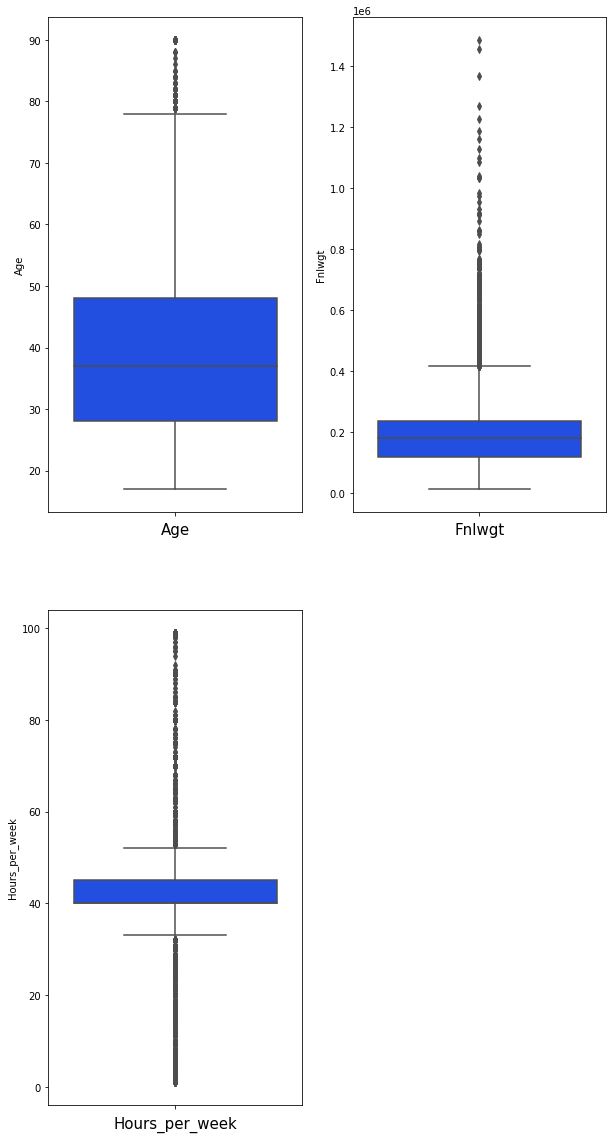

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(10,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Age and Fnlwgt are rigt skewed as median is shifted toward lower side.

2] InterQurtile range for Age is more than 25 to less than 50.

3] Interquartile range for Hoursperweek is 40 to less than 50.

4] Age and Fnlwgt has outliers can be observed only above higher bound. while for Hours_per_week beyond both bounds

* VilolinPlots 

* Continuous features

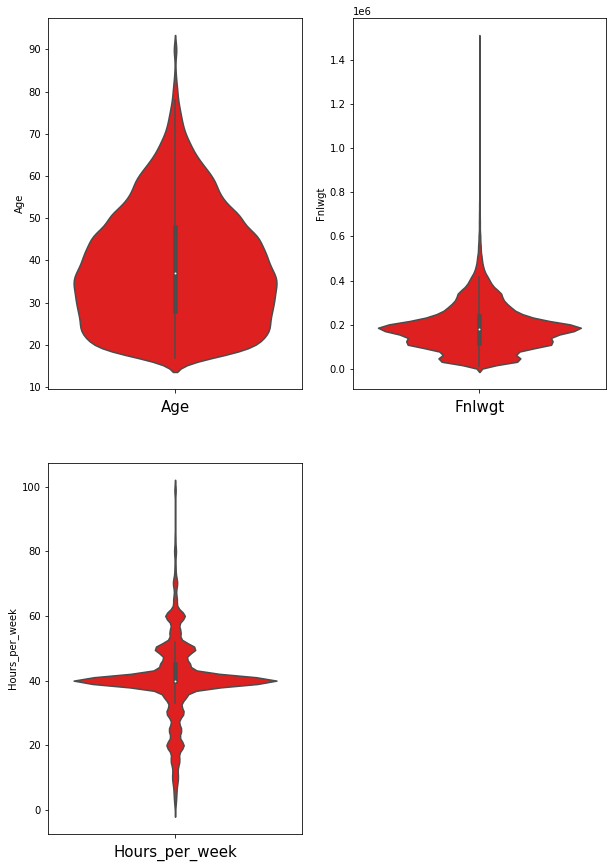

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(10,15))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],inner='box',color='r')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Age and Fnlwgt are rigt skewed as median is shifted toward lower side.

2] InterQurtile range for Age is more than 25 to less than 50.

3] Interquartile range for Hoursperweek is 40 to less than 50.

4] Age and Fnlwgt has outliers can be observed only above higher bound. while for Hours_per_week beyond both bounds

* Continuous features with Sex 

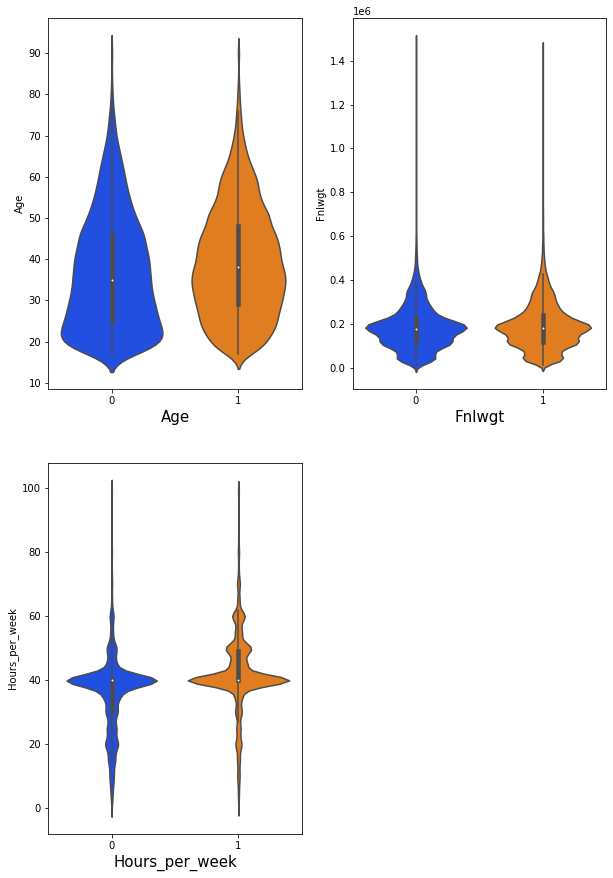

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(10,15))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df['Sex'],inner='box')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] age wise distribution of female is right skwed also median is lower than in male distribution.

2] Fnlwgt has same distribution with male and female.

3] Hours+per_week 1] interquartile range for female lower than for that of male. although median is equal.


* Continuous feature s with mariatl status

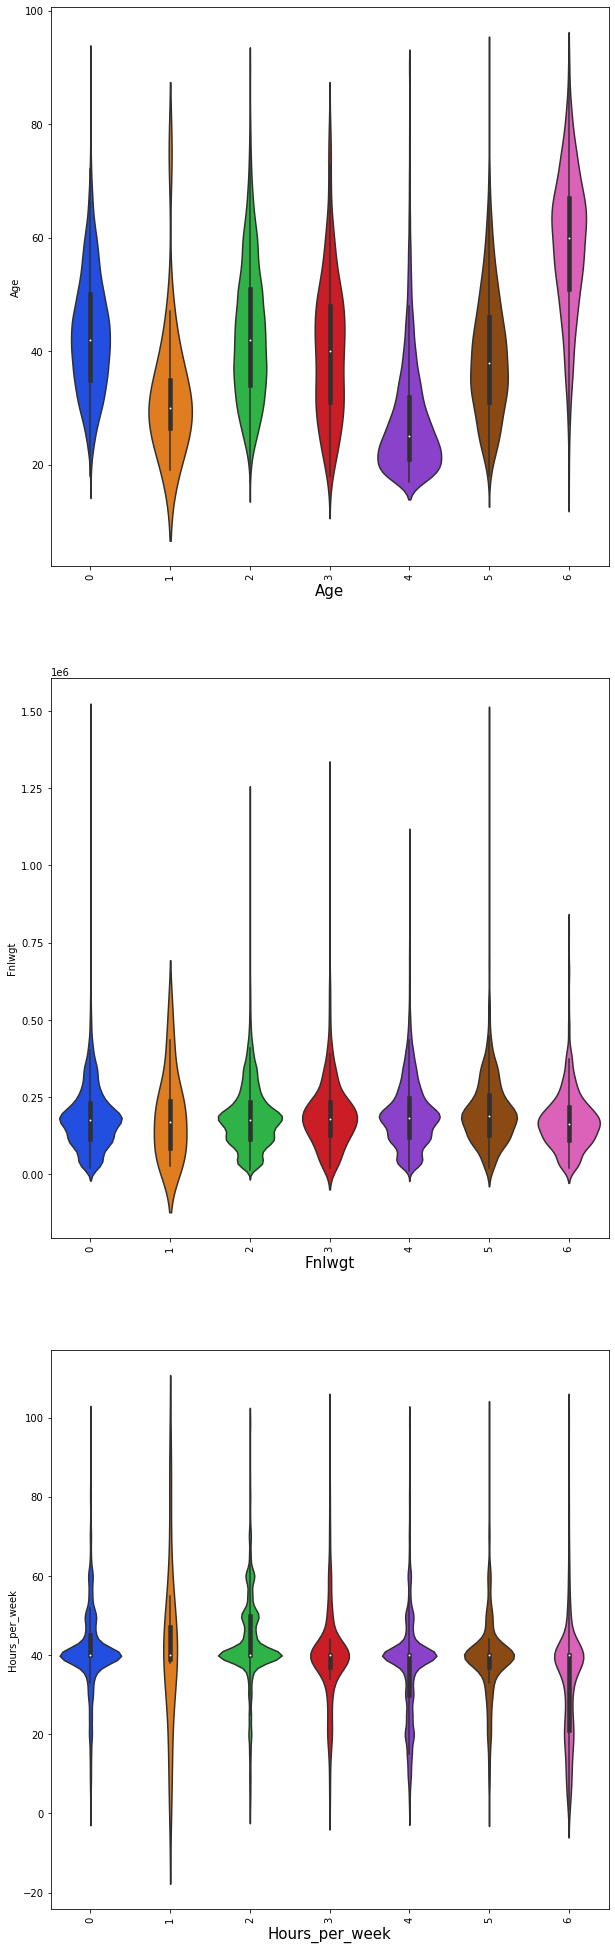

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(10,35))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(3,1,graph)
        sns.violinplot(y=df[column],x=df['Marital_status'])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation='90')
        
    graph+=1
plt.show()
plt.tight_layout()

* median for all category is nearly equual.

1] widowed category has highest  median of age  compared to other categories,While Neve_married have lowest median which shows that 
 never married people are younger people and widowed are older people.

2] Distribution marital status with  Fnlwgt are nearly equivalent.

3] Highest interquartile range extended towards lowerside with median near to third quartile can be observed in Widowed catrgory which suggest that
 widowed category people works for less hours least 20 hours per week.
    
4] Never married category are also works for less hours per week than median. median at highest at q3.

* Continuous feature s with mariatl status

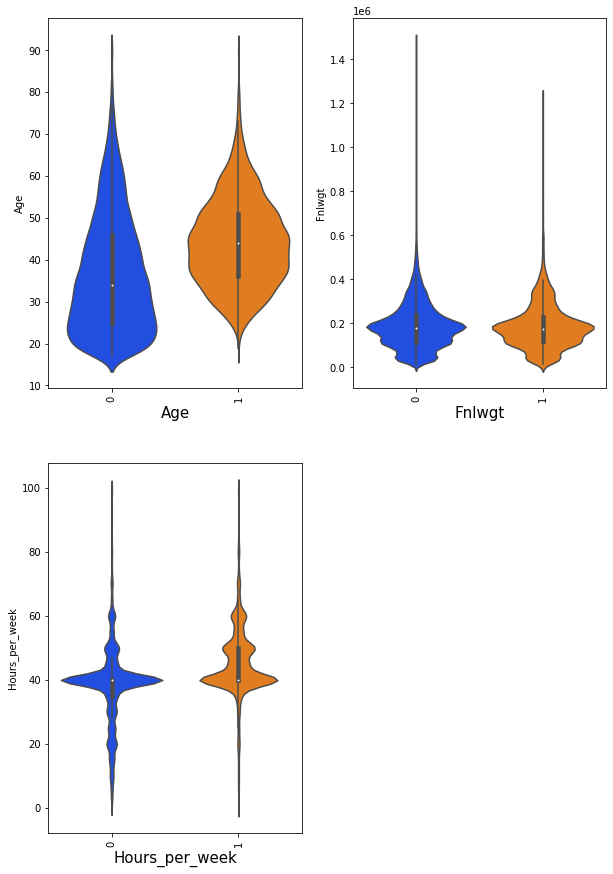

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(10,15))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df['Income'])
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation='90')
        
    graph+=1
plt.show()
plt.tight_layout()

1] Median for people having Income more than 50K is higher than that of less than 50K

2] 50% people having less than 50k income have age between 25 to 45.

3] 50% people having more than 50k income have age between 35 to 50.

4] 75% people having more than 50k income works more than median(40 ) hours.

5] 75% people having less than 50k income works less than median(40 ) hours.

* Skewness in dataset.

<AxesSubplot:>

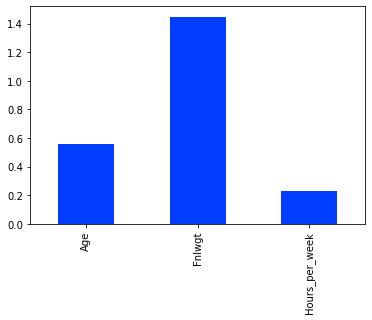

In [57]:
df[cont].skew().plot.bar()

* Outliers detection with Zscore and Analyse for dataloss

In [58]:

data=df.copy()
rows_before1=data.shape[0]
rows_before1

32560

In [59]:
from scipy.stats import zscore

z1=np.abs(zscore(data[cont]))
data=data[(z1<3).all(axis=1)]


In [60]:
rows_after1=data.shape[0]
rows_after1

31668

In [61]:
# data loss 
loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1

2.7395577395577395

* Data Loss after removal of outliers is 2.74 % so it can be safe to remove outliers with 
  z score method

* Analysis of Distribution of continuous feature before and after outliers removal

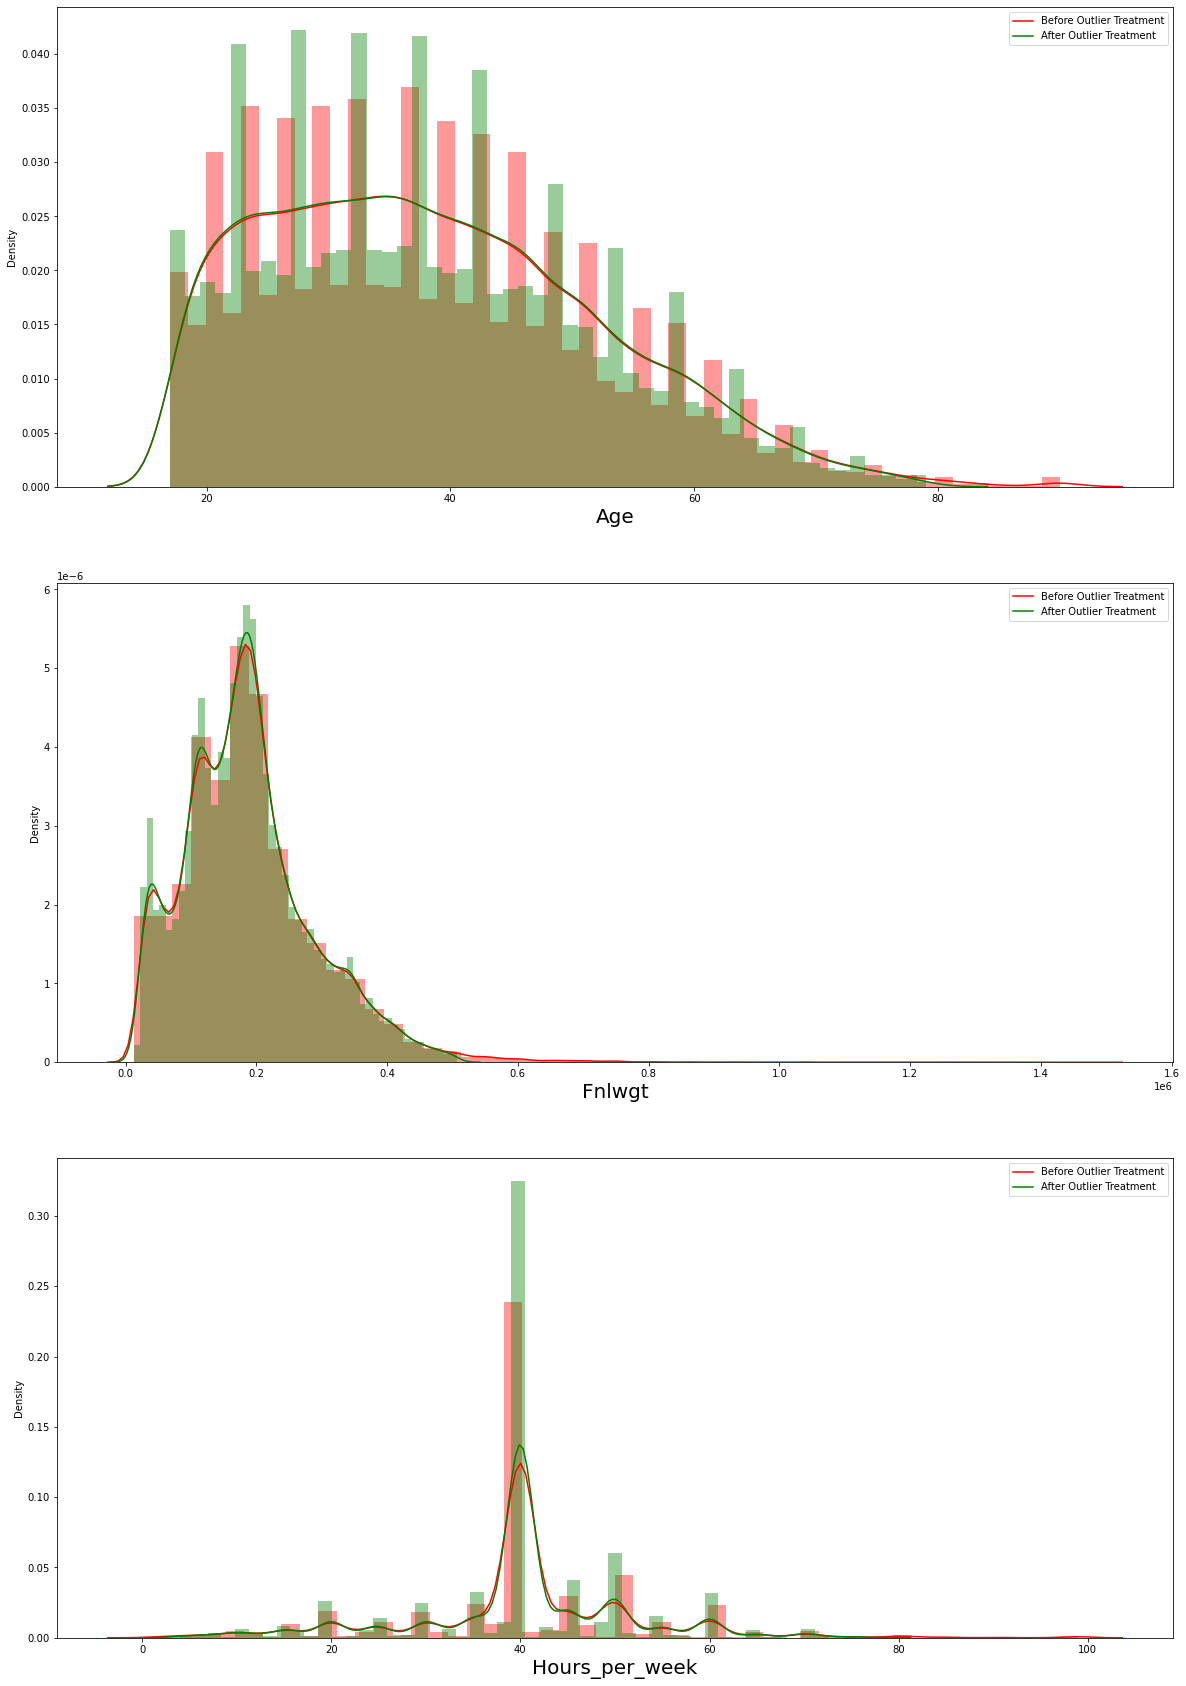

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(3,1,graph)
        sns.distplot(df[column],color='red')
        sns.distplot(data[column],color='green')
        plt.xlabel(column,fontsize=20)
        plt.legend(['Before Outlier Treatment','After Outlier Treatment'])
        
    graph+=1
plt.show()
plt.tight_layout()


* from analysis it cane be observed that removing outliers will remove about 2.75% of data which can be delelted for better performance of algorithms

In [63]:

z=np.abs(zscore(df[cont]))
df=df[(z<3).all(axis=1)]


In [64]:
df.shape

(31668, 13)

* Outliers have treated now analyse for correlation and multicollinearity in dataset.

In [65]:
cor=df.corr().abs()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.012087,0.072692,0.008081,0.041349,0.284720,0.013881,0.267398,0.028030,0.091202,0.094692,0.002461,0.245469
Workclass,0.012087,1.000000,0.015095,0.021547,0.052610,0.063722,0.249304,0.090510,0.049215,0.094766,0.128475,0.006846,0.051768
Fnlwgt,0.072692,0.015095,1.000000,0.026228,0.042969,0.028774,0.002766,0.005263,0.009552,0.030707,0.014059,0.053331,0.009608
Education,0.008081,0.021547,0.026228,1.000000,0.355569,0.037713,0.022518,0.011570,0.015704,0.027328,0.057898,0.065216,0.077843
Education_num,0.041349,0.052610,0.042969,0.355569,1.000000,0.068553,0.109273,0.096320,0.033506,0.013701,0.159157,0.051523,0.336068
Marital_status,0.284720,0.063722,0.028774,0.037713,0.068553,1.000000,0.008873,0.186441,0.067683,0.128605,0.197663,0.023532,0.198673
Occupation,0.013881,0.249304,0.002766,0.022518,0.109273,0.008873,1.000000,0.075822,0.007980,0.079297,0.071273,0.011841,0.074359
Relationship,0.267398,0.090510,0.005263,0.011570,0.096320,0.186441,0.075822,1.000000,0.115443,0.582647,0.262153,0.004845,0.250451
Race,0.028030,0.049215,0.009552,0.015704,0.033506,0.067683,0.007980,0.115443,1.000000,0.088941,0.045630,0.140190,0.072652
Sex,0.091202,0.094766,0.030707,0.027328,0.013701,0.128605,0.079297,0.582647,0.088941,1.000000,0.239183,0.008730,0.215588


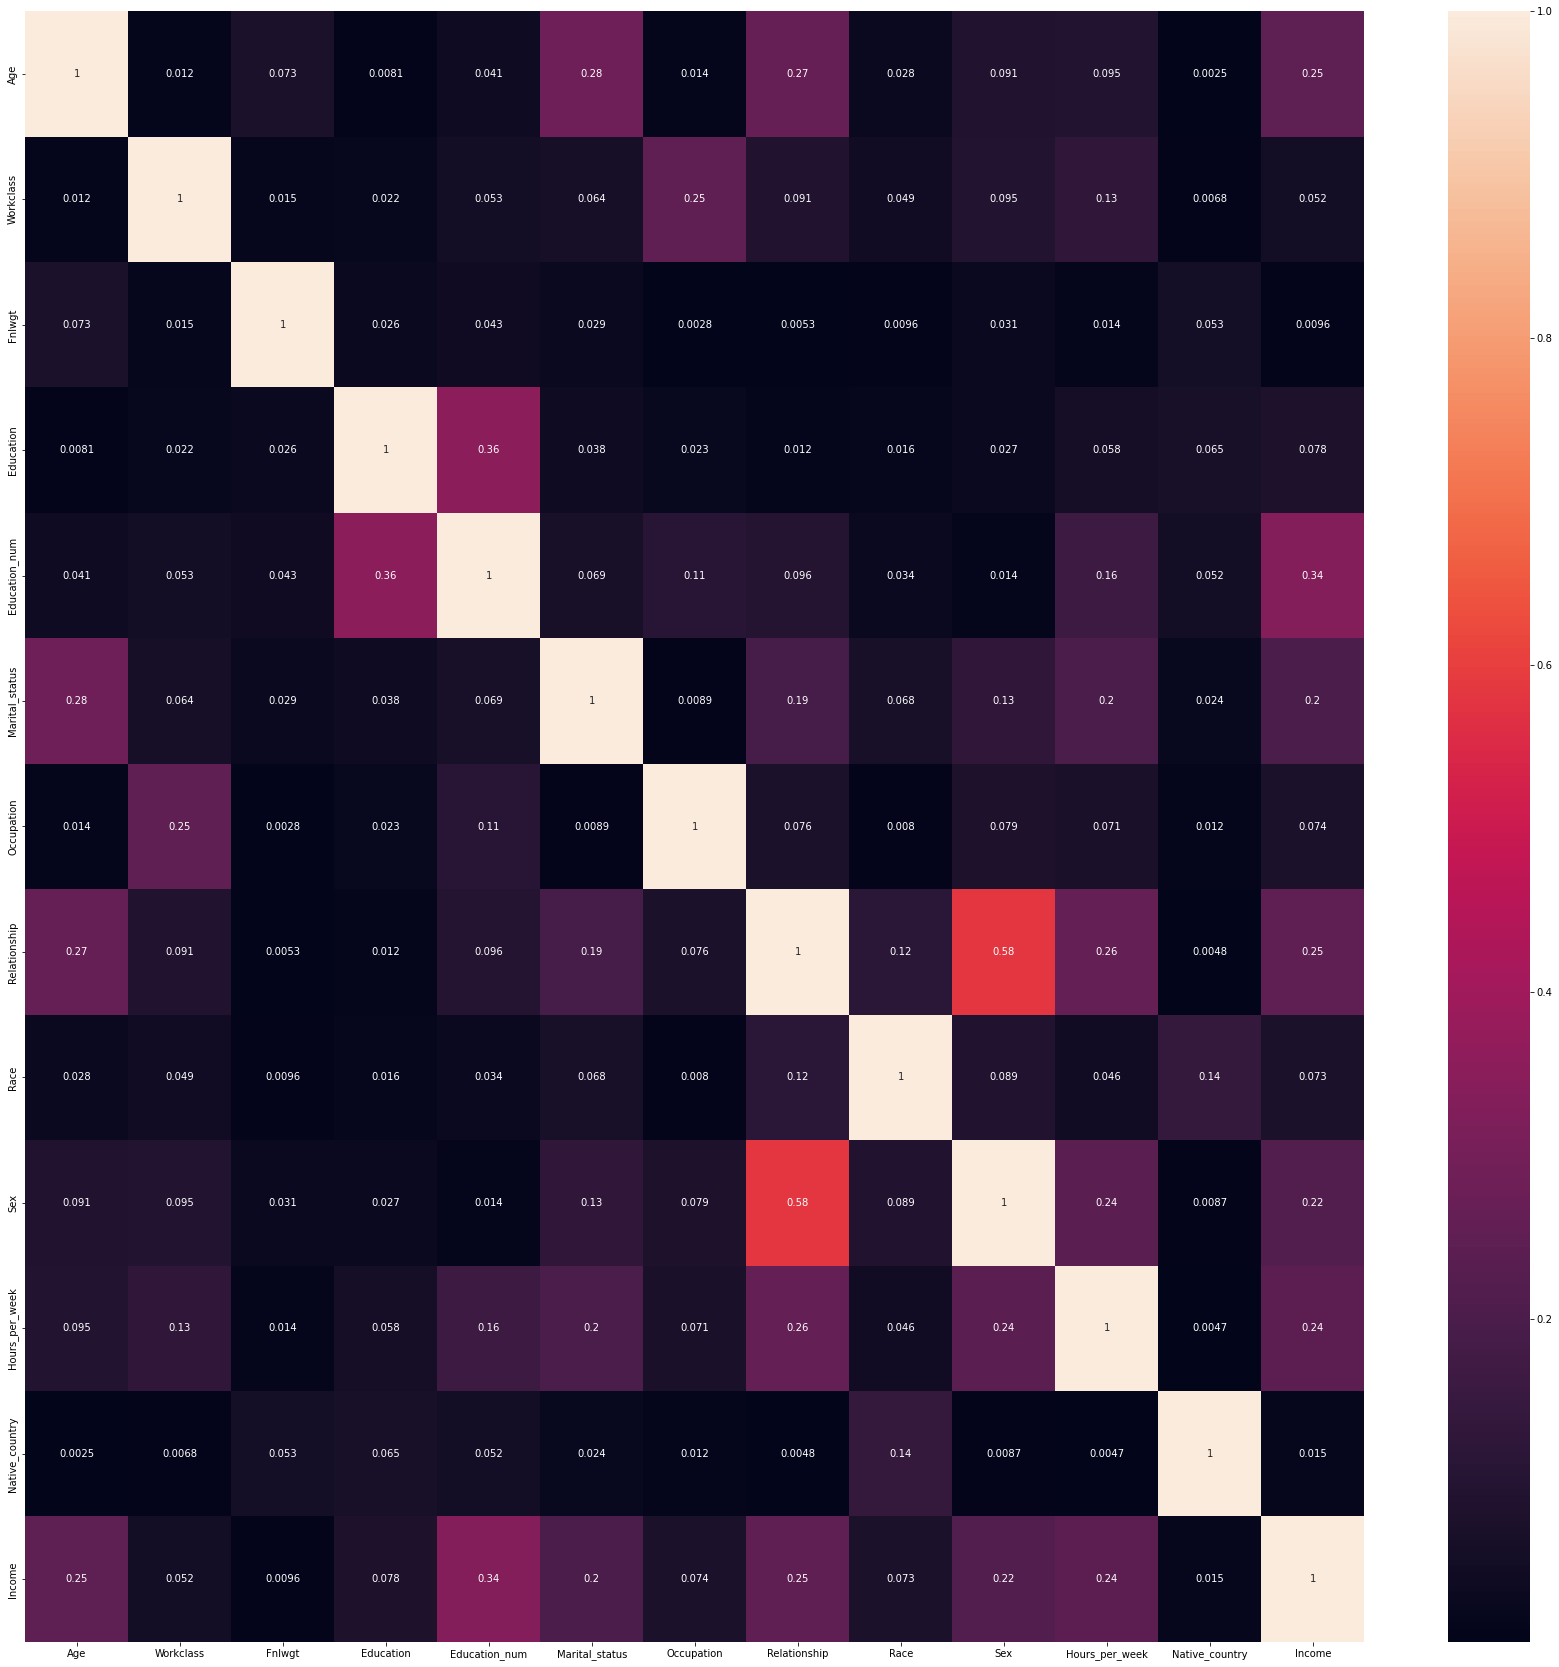

In [66]:
plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True)
plt.show()

* There is no multicollinearity observe in features except one pair

* Relationship and Sex feature have moderate correlation of 0.58 between them.

* Education_num with Education have corraltion of 0.36 .

* Visualize Relationship feature with Sex 

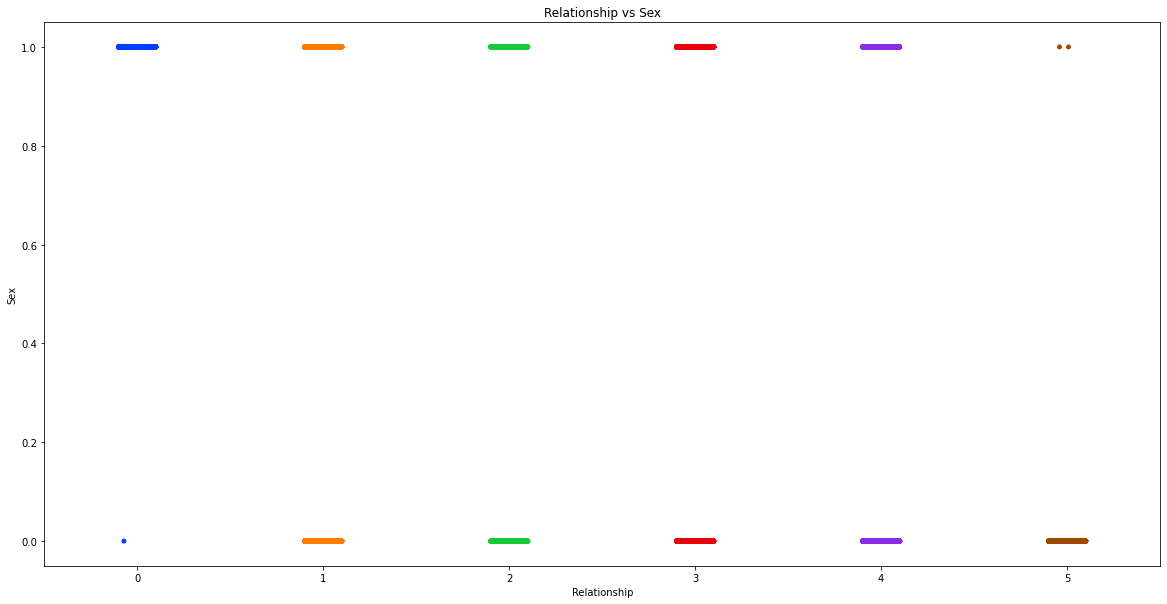

In [67]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df["Relationship"],y=df["Sex"])
plt.title('Relationship vs Sex')
plt.show()

1] There is no significant relationship can be detected.

* Visualize Eduation_num feature with Education

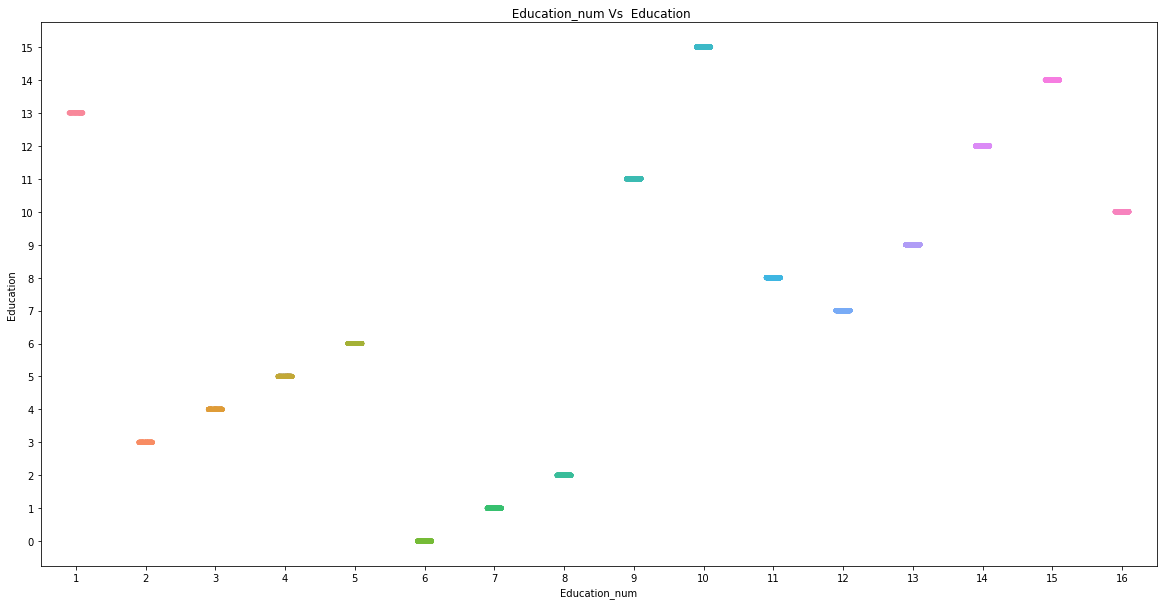

In [68]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df["Education_num"],y=df["Education"])
plt.title(" Education_num Vs  Education")
plt.yticks(range(0,16))
plt.show()

1] There is direct relationship in Education_num and Education which can be observed fro above graph.

* Analysis of correlation with label Income

In [69]:
cor_label=(df.drop('Income',axis=1)).corrwith(df['Income']).abs()
cor_label

Age               0.245469
Workclass         0.051768
Fnlwgt            0.009608
Education         0.077843
Education_num     0.336068
Marital_status    0.198673
Occupation        0.074359
Relationship      0.250451
Race              0.072652
Sex               0.215588
Hours_per_week    0.242344
Native_country    0.015199
dtype: float64

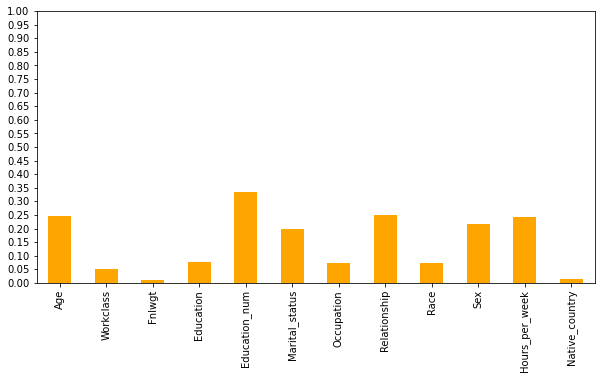

In [70]:
plt.figure(figsize=(10,5))

cor_label.plot(kind="bar",color='orange')
plt.yticks(np.arange(0,1.01,0.05))
plt.show()

1] Fnlwgt ,Capital_loss,Native_country have least corralation upto range of 0.01 
      
    a) income of person doesnot depends upon what are their capital_loss ,also final weight and it also doent depends upon from country they belong

2] Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Hours_per_week have low correaltion of range of 0.2 to 0.4.
     
    a) income of person is depends strongly on their age weather person is older or younger
    
    b) Income of person depends on what education person has persued .
    
    c) Income of person also depends on weathere the person is married or single or divorcee
    
    d) Income of person also depends on weather person is male female 
    
    e) Income of person is depends on working Hours per week



* Lets Analyse multicollinearity with VIF threshold of 10 as vif score

In [71]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Income'],axis=1)
predictor1=Predictors1.to_numpy()

In [72]:
VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1

,Features,vif_scores
0,Age,8.873543
1,Workclass,8.542717
2,Fnlwgt,4.597984
3,Education,9.206103
4,Education_num,18.418372
5,Marital_status,3.995298
6,Occupation,3.704798
7,Relationship,2.619348
8,Race,17.763347
9,Sex,4.444777


* Lets analyse vif scores after eleimination of Native_country

In [73]:
Predictors2=df.drop(columns=['Income','Native_country'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2

,Features,vif_scores
0,Age,8.546952
1,Workclass,8.494798
2,Fnlwgt,4.582952
3,Education,9.093347
4,Education_num,17.990268
5,Marital_status,3.908948
6,Occupation,3.703246
7,Relationship,2.531589
8,Race,15.757432
9,Sex,4.406690


* Lets analyse vif scores after eleimination of Education_num

In [74]:
Predictors3=df.drop(columns=['Income','Native_country','Education_num'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3

,Features,vif_scores
0,Age,8.291298
1,Workclass,8.458167
2,Fnlwgt,4.572723
3,Education,7.435242
4,Marital_status,3.865024
5,Occupation,3.629212
6,Relationship,2.521706
7,Race,15.220208
8,Sex,4.405421
9,Hours_per_week,13.115070


* Lets analyse vif scores after eleimination of Race

In [75]:
Predictors4=df.drop(columns=['Income','Native_country','Education_num','Race'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4

,Features,vif_scores
0,Age,7.578735
1,Workclass,8.218250
2,Fnlwgt,4.487270
3,Education,7.159444
4,Marital_status,3.735553
5,Occupation,3.619720
6,Relationship,2.450193
7,Sex,4.281756
8,Hours_per_week,12.299395


* Lets analyse vif scores after eleimination of Hours_per_week

In [76]:
Predictors5=df.drop(columns=['Income','Native_country','Education_num','Race','Hours_per_week'],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5

,Features,vif_scores
0,Age,6.705852
1,Workclass,7.712267
2,Fnlwgt,4.396915
3,Education,6.664370
4,Marital_status,3.720751
5,Occupation,3.585290
6,Relationship,2.427803
7,Sex,3.944372


* Multicollinearity has removed with removal of 04 feature 
  1] Native_country with correlation of 0.017 very low
  
  2] Education_num with correlation of 0.31 high with respect to other features in dataset
  
  3] Race with corraletion of 0.071 is very low 
  
  4] Hours_per_week with correlation of 0.23 
  
* There is already very low correalation of feature with label upon removing Education_num and Hours_per_week have large correlation with label can effect model accuracy.
 
* Although we can remove Native_Country and race having very less correlation 
  

* Analyse for skewness in Continuous features 

In [77]:
df[cont].skew()

Age               0.470790
Fnlwgt            0.634065
Hours_per_week   -0.338625
dtype: float64

<AxesSubplot:>

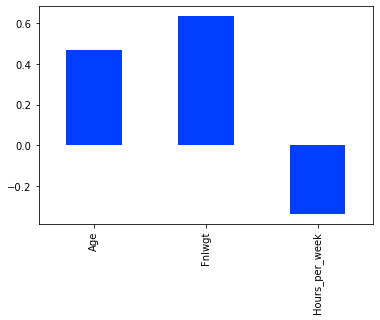

In [78]:
df[cont].skew().plot.bar()

1] Threshold fro skewness can be defined as -0.25 to 0.25 
   

2] Age,Fnlwgt and Hours_per_week have skewness 0.47 ,0.63 ,-0.34 respectively .


* Analysis of skewness and treatment with copy of original dataframe "data"

* Lets analyse transformation with  copy of dataset "data"

In [79]:
(data==df).sum()

Age               31668
Workclass         31668
Fnlwgt            31668
Education         31668
Education_num     31668
Marital_status    31668
Occupation        31668
Relationship      31668
Race              31668
Sex               31668
Hours_per_week    31668
Native_country    31668
Income            31668
dtype: int64

In [80]:
data.shape

(31668, 13)

In [81]:
df.shape

(31668, 13)

* PowerTransformer with yeo-johnson

In [82]:
from sklearn.preprocessing import PowerTransformer


transform1=pd.DataFrame()
pwr1=PowerTransformer(method='yeo-johnson')
transform1[cont]=pwr1.fit_transform(data[cont])
transform1[cont].skew()

Age              -0.019867
Fnlwgt           -0.034511
Hours_per_week    0.107569
dtype: float64

* Square Root Transformation

In [83]:
transform2=pd.DataFrame()
transform2=np.sqrt(data[cont])
transform2.skew()


Age               0.151376
Fnlwgt           -0.104793
Hours_per_week   -1.202528
dtype: float64

* Cube Root Transformation

In [84]:
transform3=pd.DataFrame()
transform3=np.cbrt(data[cont])
transform3.skew()

Age               0.046144
Fnlwgt           -0.376171
Hours_per_week   -1.527502
dtype: float64

* Log Transformation

In [85]:
transform4=pd.DataFrame()
transform4=np.log(data[cont])
transform4.skew()

Age              -0.162508
Fnlwgt           -0.952960
Hours_per_week   -2.265537
dtype: float64

* Quantile Transformation

In [86]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(n_quantiles=100,output_distribution='normal')

transform5=pd.DataFrame()
transform5[cont]=qt.fit_transform(data[cont])
transform5[cont].skew()


Age              -0.957001
Fnlwgt            0.041742
Hours_per_week   -0.198663
dtype: float64

* The least skewness is obtained with PowerTransformer yeo-johnson method  applying this method to original datset.

In [87]:
pwr=PowerTransformer(method='yeo-johnson')
df[cont]=pwr.fit_transform(df[cont])

* Analysis skewness in feature before transformation and after transformation

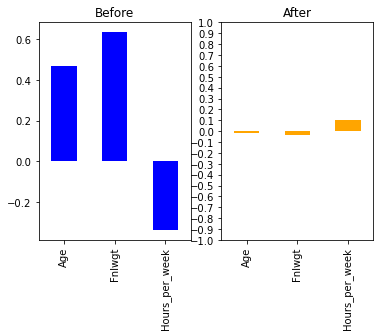

In [88]:
fig,axs=plt.subplots(1,2)

data[cont].skew().plot.bar(ax=axs[0],color='blue',title='Before')
df[cont].skew().plot.bar(ax=axs[1],color='orange',title='After')
plt.yticks(np.arange(-1,1.01,0.1))
plt.show()

* Skewness has removed effectively with as Skewness of feature is within range of 0.1 

* Analysis of Distribution of feature before and after transformation

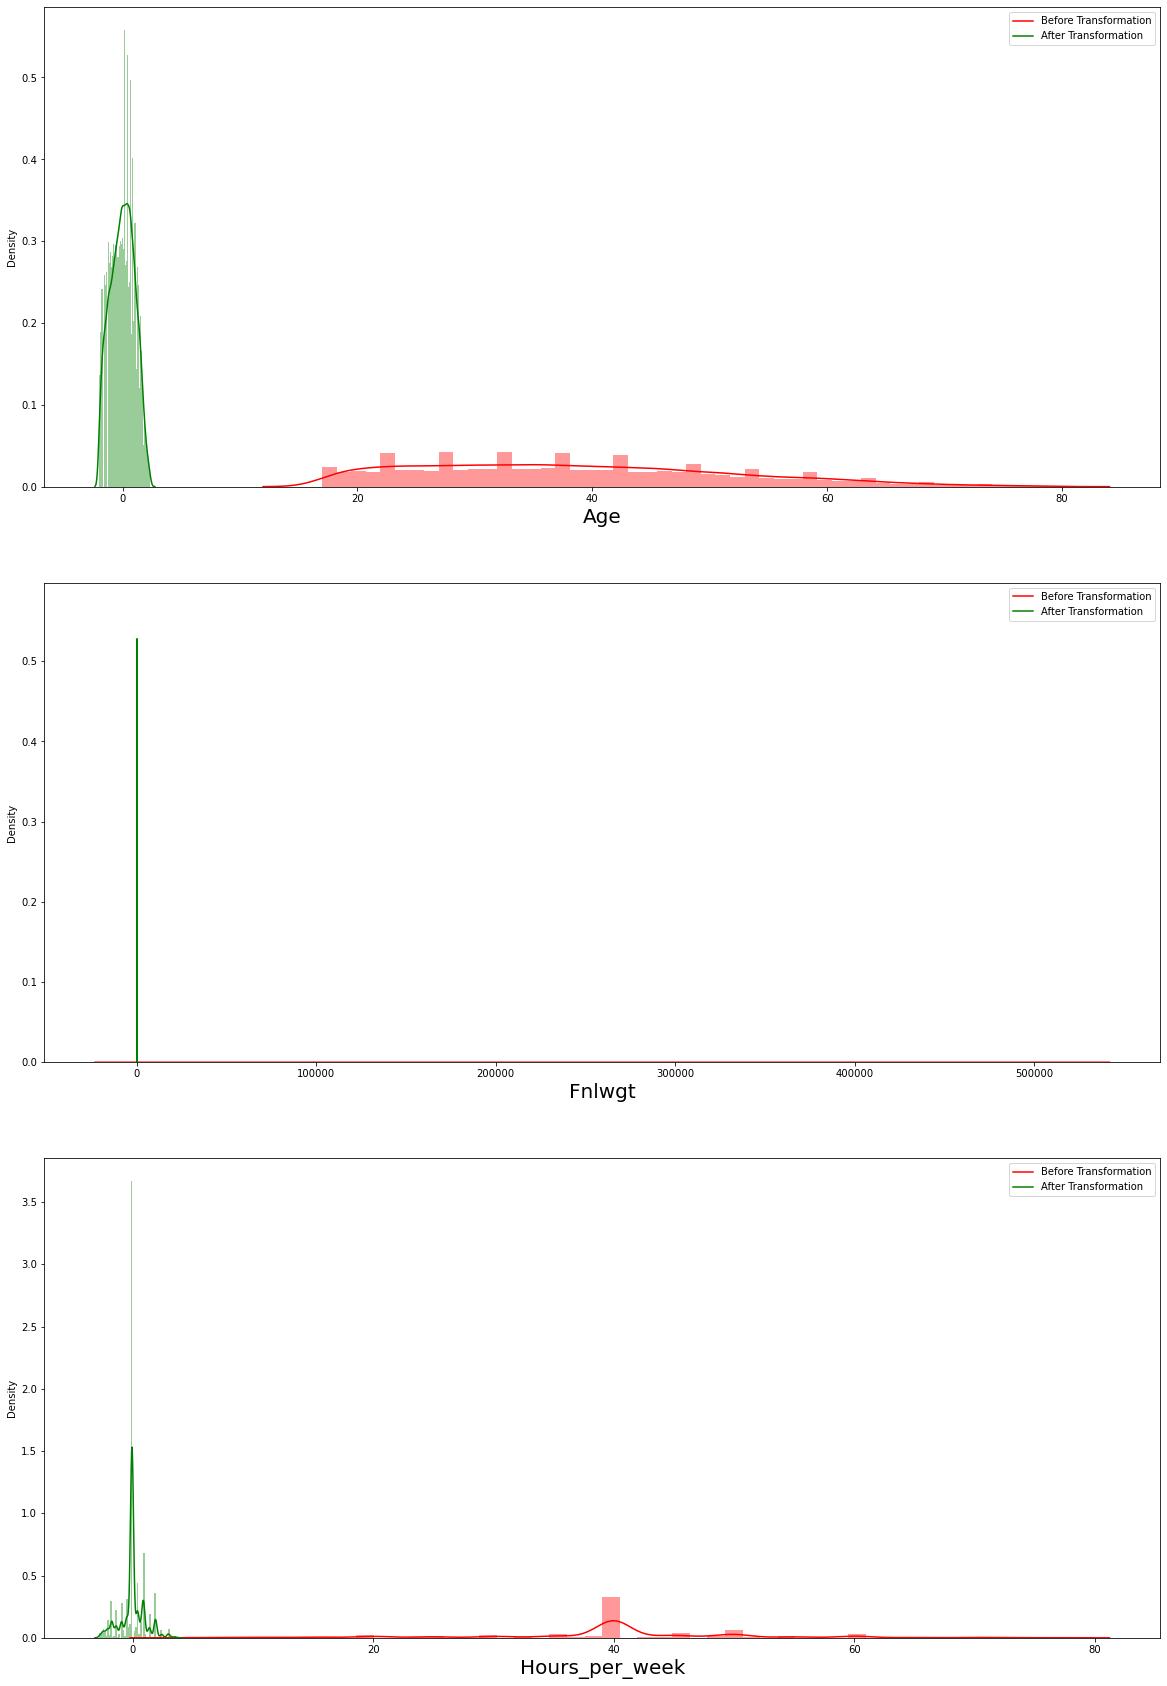

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(3,1,graph)
        sns.distplot(data[column],color='red')
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
        plt.legend(['Before Transformation','After Transformation'])
        
    graph+=1
plt.show()
plt.tight_layout()

* Analysis of data imbalanced for label Income

In [90]:
df['Income'].value_counts()

0    24055
1     7613
Name: Income, dtype: int64

<AxesSubplot:ylabel='Income'>

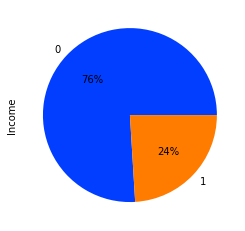

In [91]:
df['Income'].value_counts().plot.pie(autopct="%0.00f%%")

<AxesSubplot:>

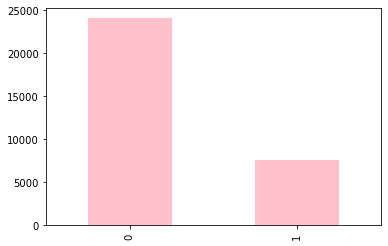

In [92]:
df['Income'].value_counts().plot.bar(color='pink')

* Splitting dataset into feature and label

In [93]:
x1=df.drop('Income',axis=1)
y1=df.Income

In [94]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (31668, 12)
y1 shape is  (31668,)


* Standadization of features.

In [95]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scaled=st.fit_transform(x1)

In [96]:
x_scaled.shape

(31668, 12)

* As feature have less correlation with label hence to handle this scenario of low correlation to extract highly correlated data  from features PCA can be effective solution.

In [97]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.89044922, -0.22610831,  0.2848727 , ...,  0.35244625,
        -1.82008734,  0.13210171],
       [-1.0472048 ,  0.40521261,  0.5980029 , ..., -1.2204442 ,
        -0.01496198,  0.16043828],
       [-0.47576808,  2.84695392,  0.18513063, ...,  0.53610798,
        -0.69407852, -0.10623371],
       ...,
       [ 1.9556644 , -0.52915981,  0.79543404, ...,  2.6357562 ,
         0.82098134,  0.66637608],
       [ 1.82479699,  0.23235796,  0.02635357, ..., -0.43232415,
        -0.53907125,  0.86447299],
       [ 1.29942971, -0.59380711,  0.4651952 , ...,  0.74969813,
         0.36741864,  0.8639109 ]])

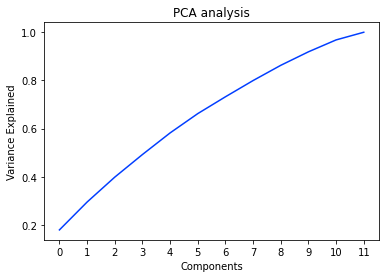

In [98]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,12))
plt.show()

In [99]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.178742
1     0.294481
2     0.398007
3     0.491920
4     0.581729
5     0.661941
6     0.731845
7     0.799345
8     0.862622
9     0.918701
10    0.968171
11    1.000000
dtype: float64

* AS can be observed the cumulative graph of  varaice is linear hence all component will be feed in algorithm. 

In [100]:
pca1=PCA(n_components=12)
dim=pca1.fit_transform(x_scaled)
x_dim=pd.DataFrame(dim,columns=[('PC{}').format(i) for i in range(1,13)])
x_dim

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.890449,-0.226108,0.284873,-0.466907,0.967300,0.680468,0.205509,1.968292,1.671072,0.352446,-1.820087,0.132102
1,-1.047205,0.405213,0.598003,-0.231052,0.245025,-0.902528,-0.115973,0.028478,0.426520,-1.220444,-0.014962,0.160438
2,-0.475768,2.846954,0.185131,0.978338,0.509831,0.027769,-1.964426,-0.119060,0.116479,0.536108,-0.694079,-0.106234
3,2.075609,-0.233881,-1.677755,4.314578,-0.713287,-1.314312,1.370349,-0.126332,-0.922320,-0.628753,-0.880138,0.455631
4,1.349662,-1.962954,0.441612,0.314497,0.222694,-1.839716,0.296390,-0.565483,-0.234108,0.320957,-0.838721,0.778410
...,...,...,...,...,...,...,...,...,...,...,...,...
31663,1.660754,-0.934212,-1.249089,-0.030657,1.156222,-1.597308,-0.102910,-0.214637,-1.483309,-0.479969,-0.669958,0.510105
31664,-1.033959,0.426057,0.200793,-0.530056,0.049814,0.182417,-0.065638,0.357437,0.314631,-0.307357,0.308238,-0.170652
31665,1.955664,-0.529160,0.795434,-0.226957,0.479251,0.070692,0.519606,-0.372186,0.477498,2.635756,0.820981,0.666376
31666,1.824797,0.232358,0.026354,-1.310580,-0.958990,0.192344,0.292480,0.382645,1.368379,-0.432324,-0.539071,0.864473


* Datset with component

In [101]:
x_dim.shape

(31668, 12)

In [102]:
y1.shape

(31668,)

* Imbalanced in classes in label 

In [103]:
y1.value_counts()

0    24055
1     7613
Name: Income, dtype: int64

<AxesSubplot:>

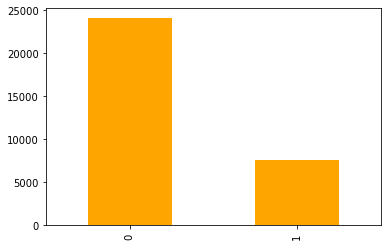

In [104]:
y1.value_counts().plot.bar(color='orange')

* Oversampling algorithms to convert imbalanced classes into balanced classes.

In [105]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(0.85,k_neighbors=3,random_state=313)

In [106]:
x,y=sm.fit_resample(x_dim,y1)

In [107]:
print('Resample features shape is ',x.shape)
print('Resample label shape is ',y.shape)

Resample features shape is  (44501, 12)
Resample label shape is  (44501,)


* Class wise Distribution of Label.   

In [108]:
y.value_counts()

0    24055
1    20446
Name: Income, dtype: int64

<AxesSubplot:>

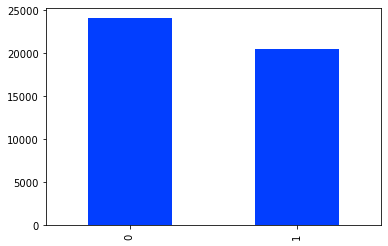

In [109]:
y.value_counts().plot.bar()

<AxesSubplot:ylabel='Income'>

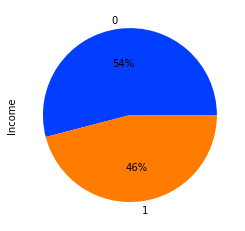

In [110]:
y.value_counts().plot.pie(autopct="%0.00f%%")

* Training algorithms 

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve

In [112]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",i)
        
        

acuracy score  0.7407032917649702 Random sate  1
Accuracy 0.7407032917649702 random_state 1
acuracy score  0.7498033928772048 Random sate  2
Accuracy 0.7498033928772048 random_state 2
acuracy score  0.7537355353331087 Random sate  3
Accuracy 0.7537355353331087 random_state 3
acuracy score  0.7483428828221548 Random sate  4
acuracy score  0.7529491068419278 Random sate  5
acuracy score  0.7531738006965509 Random sate  6
acuracy score  0.7516009437141894 Random sate  7
acuracy score  0.7557577800247163 Random sate  8
Accuracy 0.7557577800247163 random_state 8
acuracy score  0.7516009437141894 Random sate  9
acuracy score  0.7569935962251433 Random sate  10
Accuracy 0.7569935962251433 random_state 10
acuracy score  0.7508145152230087 Random sate  11
acuracy score  0.7521626783507471 Random sate  12
acuracy score  0.7425008426019548 Random sate  13
acuracy score  0.7510392090776318 Random sate  14
acuracy score  0.751937984496124 Random sate  15
acuracy score  0.7609257386810471 Random sat

In [113]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,maxRs))

Maximum accuracy Score is 0.7664307381193124 and Random state is 117


* train Test Split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=117)

In [115]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',confusion_matrix(y_tst,ypred_test))

* Logistic Regression

In [116]:
Lr1=LogisticRegression()
Lr1.fit(x_train,y_train)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.7502808988764045
******************************************************
Train roc_auc_Score is  0.7490928485057091
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7664307381193124
******************************************************
Test Precision Score is  0.7424757281553398
******************************************************
Test f1 Score is  0.7463706233988044
******************************************************
Test Recall Score is  0.7503065979887172
******************************************************
Test roc_auc_Score is  0.765182320553231
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.787     0.780     0.784      4824
           1      0.742     0.750     0.746      4077

    accuracy                          0.766      8901
   macro 

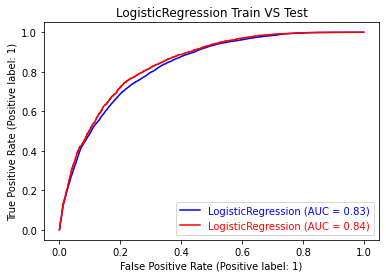

In [117]:
AucPlot1=plot_roc_curve(Lr1,x_train,y_train,color='b')
plot_roc_curve(Lr1,x_test,y_test,ax=AucPlot1.ax_,color='r')
plt.title("LogisticRegression Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Decision Tree Classifier

In [118]:
dt1=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,min_samples_leaf=3,max_depth=None,random_state=5)
dt1.fit(x_train,y_train)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.968061797752809
******************************************************
Train roc_auc_Score is  0.9673426272113398
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8153016514998315
******************************************************
Test Precision Score is  0.7929207801589213
******************************************************
Test f1 Score is  0.8002430133657352
******************************************************
Test Recall Score is  0.8077017414765759
******************************************************
Test roc_auc_Score is  0.8147132256304935
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.835     0.822     0.828      4824
           1      0.793     0.808     0.800      4077

    accuracy                          0.815      8901
   macro 

In [119]:
knn1=KNeighborsClassifier(n_neighbors=5,leaf_size=40,algorithm='auto',weights='distance')
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9999719101123595
******************************************************
Train roc_auc_Score is  0.9999694544565948
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8583305246601506
******************************************************
Test Precision Score is  0.7900700453234446
******************************************************
Test f1 Score is  0.858806404657933
******************************************************
Test Recall Score is  0.9406426293843513
******************************************************
Test roc_auc_Score is  0.8647035700818936
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.940     0.789     0.858      4824
           1      0.790     0.941     0.859      4077

    accuracy                          0.858      8901
   macro 

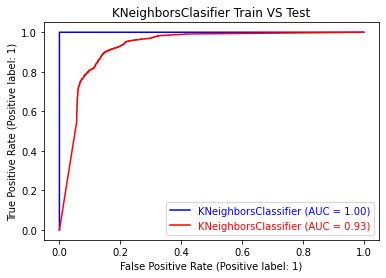

In [120]:
AucPlot3=plot_roc_curve(knn1,x_train,y_train,color='b')
plot_roc_curve(knn1,x_test,y_test,ax=AucPlot3.ax_,color='r')
plt.title("KNeighborsClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* GradientBoostingClassifier

In [121]:
gbdt1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,criterion='friedman_mse',min_samples_split=5,min_samples_leaf=3,max_depth=12,random_state=5)
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9906460674157304
******************************************************
Train roc_auc_Score is  0.99130119119614
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8619256263341197
******************************************************
Test Precision Score is  0.8218806509945751
******************************************************
Test f1 Score is  0.8554287730855193
******************************************************
Test Recall Score is  0.891832229580574
******************************************************
Test roc_auc_Score is  0.8642411562496568
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.901     0.837     0.868      4824
           1      0.822     0.892     0.855      4077

    accuracy                          0.862      8901
   macro av

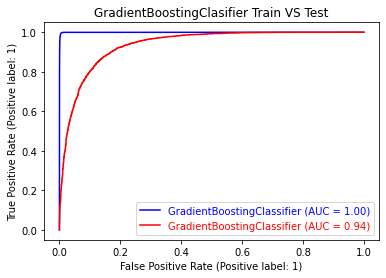

In [122]:
AucPlot4=plot_roc_curve(gbdt1,x_train,y_train,color='b')
plot_roc_curve(gbdt1,x_test,y_test,ax=AucPlot4.ax_,color='r')
plt.title("GradientBoostingClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* RandomForestClassifier

In [123]:
rf1=RandomForestClassifier(criterion='gini',max_depth=17,min_samples_split=3,min_samples_leaf=1,bootstrap=True,oob_score=True,random_state=5)
rf1.fit(x_train,y_train)

Cscore(rf1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf1,x_train,y_train,x_test,y_test,train_score=False)



******** Train Results***************
Train Accuracy Score is  0.9538483146067416
******************************************************
Train roc_auc_Score is  0.9570188529965632
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8645096056622852
******************************************************
Test Precision Score is  0.8165380374862183
******************************************************
Test f1 Score is  0.8599628425452858
******************************************************
Test Recall Score is  0.9082658817758156
******************************************************
Test roc_auc_Score is  0.8678974516673439
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.914     0.828     0.869      4824
           1      0.817     0.908     0.860      4077

    accuracy                          0.865      8901
   macro

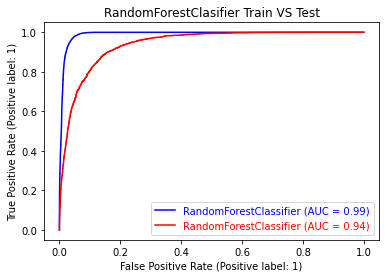

In [124]:
AucPlot5=plot_roc_curve(rf1,x_train,y_train,color='blue')
plot_roc_curve(rf1,x_test,y_test,ax=AucPlot5.ax_,color='red')
plt.title("RandomForestClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* AdaBoostClassifier

In [125]:
ada1=AdaBoostClassifier(n_estimators=100,learning_rate=0.001,random_state=7)
ada1.fit(x_train,y_train)

Cscore(ada1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(ada1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.7358426966292135
******************************************************
Train roc_auc_Score is  0.7398702831425269
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7398045163464779
******************************************************
Test Precision Score is  0.6869823741771076
******************************************************
Test f1 Score is  0.736398816298657
******************************************************
Test Recall Score is  0.7934755948000981
******************************************************
Test roc_auc_Score is  0.7439600196222712
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.799     0.694     0.743      4824
           1      0.687     0.793     0.736      4077

    accuracy                          0.740      8901
   macro 

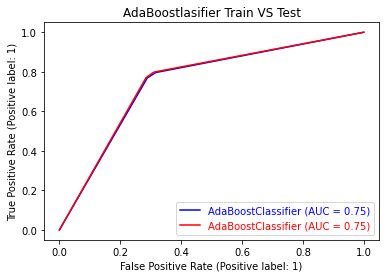

In [126]:
AucPlot7=plot_roc_curve(ada1,x_train,y_train,color='blue')
plot_roc_curve(ada1,x_test,y_test,ax=AucPlot7.ax_,color='red')
plt.title("AdaBoostlasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* XGClassifier

In [127]:
xgc1=XGBClassifier(learning_rate=0.1,booster='gbtree',max_depth=15,random_state=5)
xgc1.fit(x_train,y_train)

Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.9887640449438202
******************************************************
Train roc_auc_Score is  0.9895637579552906
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8658577687900236
******************************************************
Test Precision Score is  0.8238598067849922
******************************************************
Test f1 Score is  0.8599906191369605
******************************************************
Test Recall Score is  0.8994358597007603
******************************************************
Test roc_auc_Score is  0.8684575650079257
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.908     0.837     0.871      4824
           1      0.824     0.899     0.860      4077

    accuracy                          0.866      8901
   macro

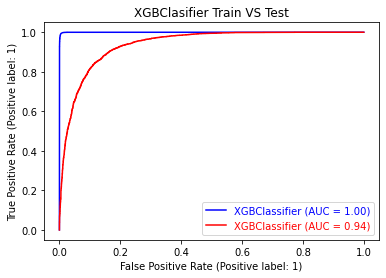

In [128]:
AucPlot6=plot_roc_curve(xgc1,x_train,y_train,color='blue')
plot_roc_curve(xgc1,x_test,y_test,ax=AucPlot6.ax_,color='red')
plt.title("XGBClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Finding best cv param for performing and obtaining most generalized cross validation score

In [129]:

from sklearn.model_selection import cross_val_score


for i in [3,5,7,8,9,10]:
    cv=cross_val_score(LogisticRegression(),x,y,cv=i,scoring='accuracy')
    print("Accuracy score is {0} for cv={1}".format(cv.mean(),i))

Accuracy score is 0.7532191764944246 for cv=3
Accuracy score is 0.7534888618751333 for cv=5
Accuracy score is 0.7534889060670792 for cv=7
Accuracy score is 0.7533317126894621 for cv=8
Accuracy score is 0.7533091305693079 for cv=9
Accuracy score is 0.7536688031221365 for cv=10


* Most generalized score is obtained with cv=9 and 8 but due to sysytem limitations I will use 5 which also has approx. same result with minute diff. of 0.0001. 

* Table for analysis of scores.

In [130]:
classifiers =[Lr1,knn1,gbdt1,dt1,rf1,xgc1,ada1]
name=['LogisticRegression','KNeighborsClassifier','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier']

In [131]:
test_score=[]
ra_score=[]
train_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    ypred_train=i.predict(x_train)
    test_score.append(accuracy_score(y_test,ypred_test))
    ra_score.append(roc_auc_score(y_test,ypred_test))
    train_score.append(accuracy_score(y_train,ypred_train))

* cross validation with cv=5

In [132]:
cv_scores_mean=[]
cv_scores=[]
for clf in classifiers:
    scr=cross_val_score(clf,x,y,cv=7,scoring="accuracy")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.7534889060670792,
 0.8610603278593173,
 0.8639815757017023,
 0.8117807002473825,
 0.8626556360544939,
 0.8672850065848984,
 0.7358261921914883]

In [133]:
Eval_clf=pd.DataFrame({'Classifier':name,'Train Accuracy Score':train_score,'Test Accuracy Score':test_score,
                      'ROC_AUC_Score':ra_score,'Validation Score':cv_scores_mean})
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score
0,LogisticRegression,0.750281,0.766431,0.765182,0.753489
1,KNeighborsClassifier,0.999972,0.858331,0.864704,0.861060
2,GradientBoostClassifier,0.990646,0.861926,0.864241,0.863982
3,DecisionTreeClassifier,0.968062,0.815302,0.814713,0.811781
4,RandomForestClassifier,0.953848,0.864510,0.867897,0.862656
5,XGBoostClassifier,0.988764,0.865858,0.868458,0.867285
6,AdaBoostClassifier,0.735843,0.739805,0.743960,0.735826


In [134]:
Eval_clf["criteria of selecting best model"]=Eval_clf['Test Accuracy Score']-Eval_clf['Validation Score']
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
0,LogisticRegression,0.750281,0.766431,0.765182,0.753489,0.012942
1,KNeighborsClassifier,0.999972,0.858331,0.864704,0.861060,-0.002730
2,GradientBoostClassifier,0.990646,0.861926,0.864241,0.863982,-0.002056
3,DecisionTreeClassifier,0.968062,0.815302,0.814713,0.811781,0.003521
4,RandomForestClassifier,0.953848,0.864510,0.867897,0.862656,0.001854
5,XGBoostClassifier,0.988764,0.865858,0.868458,0.867285,-0.001427
6,AdaBoostClassifier,0.735843,0.739805,0.743960,0.735826,0.003978


In [135]:
Eval_clf.sort_values(by="criteria of selecting best model",ascending=True)

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
1,KNeighborsClassifier,0.999972,0.858331,0.864704,0.861060,-0.002730
2,GradientBoostClassifier,0.990646,0.861926,0.864241,0.863982,-0.002056
5,XGBoostClassifier,0.988764,0.865858,0.868458,0.867285,-0.001427
4,RandomForestClassifier,0.953848,0.864510,0.867897,0.862656,0.001854
3,DecisionTreeClassifier,0.968062,0.815302,0.814713,0.811781,0.003521
6,AdaBoostClassifier,0.735843,0.739805,0.743960,0.735826,0.003978
0,LogisticRegression,0.750281,0.766431,0.765182,0.753489,0.012942


1] KneighborsClassifeir,XGBClassifier, ,RandomForestClassifier GradientBoostingclassifier have higher performance with least deviation from test score even higher score in validation score.

2] Test And Train accuracy is better for KneighborsClassifeir,XGBClassifier,GradientBoostingclassifier with less difference in Test and Train score .

4] RandomForestClassifier have less score in validation than test which is very less 0.0001 .

5] We will perform Hyperpaameter tunning on KneighborsClassifeir, XGBClassifier,GradientBoostingclassifier,RandomForestClassifier. after analysing Auc curve for these classifiers.

 

* List for AUC Curve analysis.

In [136]:
CLF =[knn1,gbdt1,rf1,xgc1]

* AUC plot for Train Data

In [137]:
def TrainAUCplot(clf_list,x_train,y_train):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_train,y_train)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_train,y_train,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Train data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

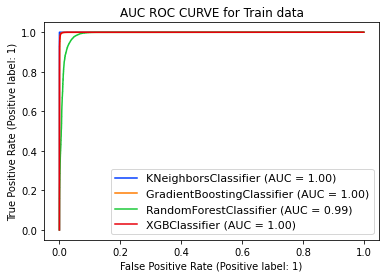

In [138]:
TrainAUCplot(CLF,x_train,y_train)

1] GradientBoostingClassifeir, XGBClassifier,DecisionTreeclassifier estimators have best performance as they have auc as 1.0 

2] RandomForestClassifier has 0.99 on train data.

* AUC for Test Data

In [139]:
def TestAUCplot(clf_list,x_test,y_test):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_test,y_test)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_test,y_test,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Test data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

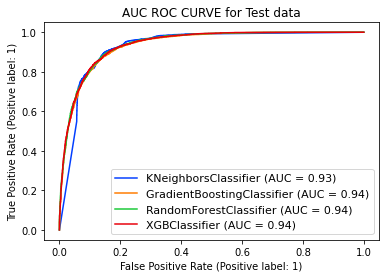

In [140]:
TestAUCplot(CLF,x_test,y_test)


1] XGBClassifier And RandomFoerestClassifier,GradientBoostingClassifier have 0.94 auc on test data.

2]  KneighborsClassifier have 0.93 auc on test data. 



* Analysis 

I will perform hyperparameter tunning on XGBClassifier RandomFoerestClassifier,GradientBoostingClassifier, KneighborsClassifier

In [141]:
from sklearn.model_selection import GridSearchCV

* Hyperparameter tunning of KNeighborsClassifier

In [142]:
param2={'n_neighbors':[3,5,7,9],'metric':["minkowski",'cosine'],'leaf_size':[8,10,20,40],
        'weights':['uniform','distance']}

grid2=GridSearchCV(KNeighborsClassifier(),param_grid=param2,cv=5).fit(x_train,y_train) 
print(grid2.best_params_)
     


{'leaf_size': 8, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}


In [143]:
knn2=grid2.best_estimator_
knn2.fit(x_train,y_train)

Cscore(knn2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.9999719101123595
******************************************************
Train roc_auc_Score is  0.9999740003119962
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8666441972812043
******************************************************
Test Precision Score is  0.8007910074937552
******************************************************
Test f1 Score is  0.8663438801936719
******************************************************
Test Recall Score is  0.9435859700760363
******************************************************
Test roc_auc_Score is  0.8726014427494609
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.944     0.802     0.867      4824
           1      0.801     0.944     0.866      4077

    accuracy                          0.867      8901
   macro

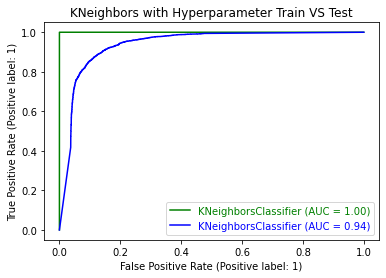

In [144]:
AucPlot7=plot_roc_curve(knn2,x_train,y_train,color='green')
plot_roc_curve(knn2,x_test,y_test,ax=AucPlot7.ax_,color='blue')
plt.title("KNeighbors with Hyperparameter Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Hyperparameter tunning in GradientBoostingClassifier

In [ ]:
param3={'n_estimators':[50,100],
         'min_samples_split':[5,7,12,15],
            'max_depth':[8,12,15,18],
        "min_samples_leaf":[3,5,10,15],
           'learning_rate':[1.0,0.1,0.01,0.05]}


grid3=GridSearchCV(GradientBoostingClassifier(random_state=5),cv=5,param_grid=param3)
grid3.fit(x_train,y_train)
print(grid3.best_params_)

In [ ]:
gbdt2=grid3.best_estimator_
gbdt2.fit(x_train,y_train)

Cscore(gbdt2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt2,x_train,y_train,x_test,y_test,train_score=False)


In [ ]:
AucPlot8=plot_roc_curve(gbdt2,x_train,y_train,color='b')
plot_roc_curve(gbdt2,x_test,y_test,ax=AucPlot8.ax_,color='r')
plt.title("GradientBoostingClasifier Tuned Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Hyperparameter tunning in XGBClassifier

In [ ]:
param4={'eta':[0.01,0.05,0.1,0.15],'learning_rate':[0.2,0.1,0.05,0.01],
        'max_depth':[7,10,15,20],'booster':['gbtree','gblinear'] }

grid4=GridSearchCV(XGBClassifier(random_state=5),param_grid=param4,cv=5).fit(x_train,y_train) 
print(grid4.best_params_)
     


In [ ]:
xg2=grid4.best_estimator_
xg2.fit(x_train,y_train)

Cscore(xg2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xg2,x_train,y_train,x_test,y_test,train_score=False)


In [ ]:
AucPlot9=plot_roc_curve(xg2,x_train,y_train,color='b')
plot_roc_curve(xg2,x_test,y_test,ax=AucPlot9.ax_,color='r')
plt.title("XGBClasifier Tuned Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Hyperparameter tunning in RandomForestClassifier

In [ ]:
param5={'criterion' : ['gini','entropy','log_loss'],
                     'max_depth' :[9,13,15,20],
                      'min_samples_split' :[3,5,7,9], 
                     'min_samples_leaf' :[1,3,5,9],
                     'max_samples' : [0.7,0.8],
                     
                      }


grid5=GridSearchCV(RandomForestClassifier(random_state=5,bootstrap=True,oob_score=True),param_grid=param5,cv=5).fit(x_train,y_train) 
print(grid5.best_params_)

In [ ]:
rf2=grid5.best_estimator_
rf2.fit(x_train,y_train)

Cscore(rf2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf2,x_train,y_train,x_test,y_test,train_score=False)


In [ ]:
AucPlot10=plot_roc_curve(rf2,x_train,y_train,color='b')
plot_roc_curve(rf2,x_test,y_test,ax=AucPlot9.ax_,color='r')
plt.title("RandomForestClasifier Tuned Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

1] Hyperparameter tunning with GradientBoosting classifier,RandomForestClassifier and XGBClassifier can not be achieved due to system limitations.

* The  Best model achieve is knn2  which is KNeighborsClassifier with hyperparameter tunnig as 'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance' with scores as follows 

1] Train score = 0.999

2] Test Score = 0.8666

3] Test roc_auc_score = 0.8726

4] AUC is 0.94

# Save model

In [146]:
import joblib
joblib.dump(knn2,"CenKNN.pkl")

['CenKNN.pkl']